| Broad Category                               | Subcategories                                | Specific Organs                                                                                                                                                                                                                     |
|----------------------------------------------|----------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Central and Peripheral Nervous System**    | Central Nervous System, Head and Neck        | Brain, human brain, cerebral, brainstem, spinal cord, cells, optical chiasm, left optical nerve, right optical nerve, eye, head, neck, head and neck, H&N, mandible, left parotid, right parotid, left submandibular gland, right submandibular gland |
| **Circulatory and Respiratory Systems**      | Cardiovascular System, Respiratory System    | Heart, vein, chest, lung, left lung, right lung, thorax, esophagus, trachea, arterial, blood vessels                                                                                                                                |
| **Digestive and Excretory Systems**          | Digestive System, Genitourinary System       | Liver, stomach, gallbladder, hepatic, hepatic vein, large bowel, duodenum, small bowel, abdomen, colon, colon tissue, gastro, colorectal, genitourinary system, pelvic region, pelvis, kidney, left kidney, right kidney, bladder, renal, rectum, small intestine |
| **Structural and Protective Systems**        | Musculoskeletal System, Integumentary System | Musculoskeletal system, skin, hair, nails, femoral head, Musculoskeletal                                                                                                                                                           |
| **Regulatory Systems**                       | Endocrine System, Lymphatic System           | Lymph nodes, spleen, thyroid, pituitary gland, pancreas, auxillary                                                                                                                                                                  |
| **Reproductive Systems**                     | Male Reproductive System, Female Reproductive System | Penis, prostate, testes, cervix, uterus, ovaries, mammary glands, breast, brest                                                                                                                                            |
| **Whole Body and Non-Specific**              | Whole Body, No Organ Mentioned               | Whole body, cells, tissue, stroma, no organ mentioned, 0                                                                                                                                                                           |
| **Zoology**                                  | Zoology                                      | Swine liver, monkey brain                                                                                                                                                                                                           |


In [323]:
organ_types_by_category = {
    "Central Nervous System"                    : ['brain', 'human brain', 'cerebral'],
    "Head and Neck"                             : ['eye', 'head', 'neck', 'head and neck', 'h&n', 'oropharynx'],
    "Cardiovascular System"                     : ['heart', 'vein', 'arterial', 'blood vessels'],
    "Respiratory System"                        : ['chest', 'lung', 'left lung', 'right lung', 'thorax'],
    "Digestive System"                          : ['stomach', 'large bowel', 'duodenum', 'abdomen', 'colon',  'colorectal',  'colorectal', 'rectum', 'small intestine',
                                                    'liver', 'gallbladder', 'hepatic', 'hepatic vein'],
    "Regulatory Systems"                        : ['lymph nodes', 'lymp nodes', 'spleen', 'thyroid', 'pituitary gland', 'pancreas'],
    "Genitourinary System"                      : ['pelvic region', 'pelvis', 'kidney', 'renal', 'bladder'],
    "Structural and Protective Systems"         : ['skin', 'femoral head', 'Musculoskeletal'],
    "Whole Body"                                : ['whole body', 'tissue', 'stroma'],
    "Male Reproductive System"                  : ['prostate'],
    "Female Reproductive System"                : ['cervix', 'mammary glands','breast', 'brest'],
    'No Organ Mentioned'                        : ['no organ mentioned'],
    "Zoology"                                   : ['swine liver', 'monkey brain']
}

In [324]:
# organ_types_by_category = {
#     "Central and Peripheral Nervous System"     : ['brain', 'human brain', 'cerebral', 'eye', 'head', 'neck', 'head and neck', 
#                                                   'h&n', 'oropharynx'],
#     "Circulatory and Respiratory Systems"       : ['heart', 'vein', , 'arterial', 'blood vessels', 'chest', 'lung', 'left lung', 'right lung', 'thorax'],
#     "Digestive and Excretory Systems"           : ['liver', 'stomach', 'gallbladder', 'hepatic', 'hepatic vein','abdomen', 
#                                                     'colon', 'colorectal', 'pelvic region','pelvis', 'kidney', 'bladder', 'renal', 'rectum', 'small intestine'],
#     "Regulatory Systems"                        : ['lymph nodes', 'lymp nodes', 'spleen', 'thyroid', 'pituitary gland', 'pancreas'],
#     "Structural and Protective Systems"         : ['skin', 'femoral head', 'Musculoskeletal'],
#     "Whole Body"                                : ['whole body', 'tissue', 'stroma'],
#     "Male Reproductive System"                  : ['prostate'],
#     "Female Reproductive System"                : ['cervix', 'mammary glands','breast', 'brest'],
#     'No Organ Mentioned'                        : ['no organ mentioned'],
#     "Zoology"                                   : ['swine liver', 'monkey brain']
# }

# Function to categorize each value and return the set of categories
def categorize_row(row):
    # Split the row by comma and strip spaces
    organ_types = [x.strip() for x in row.split(',')]
    # Initialize a set to hold unique categories for this row
    row_categories = set()
    for organ_type in organ_types:
        # Check each category for a match and add to the set
        for category, types in organ_types_by_category.items():
            if organ_type in types:
                row_categories.add(category)
                break
    # Return a comma-separated string of unique categories or a single category
    return ', '.join(row_categories) if row_categories else 'Uncategorized'

# Apply the categorization function to each row in the DataFrame
df1['organ_category_refined'] = df1['organ/body part in datasets'].apply(categorize_row)

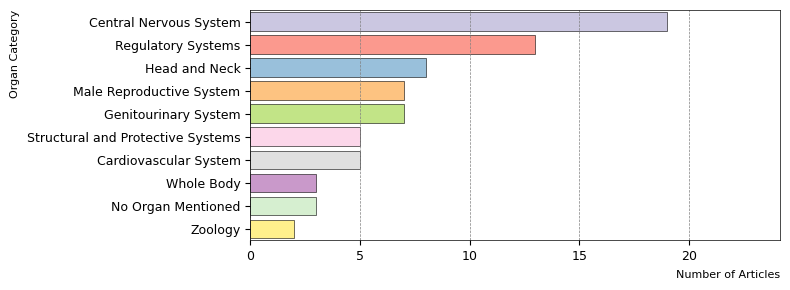

In [325]:
colors = plt.cm.Set3_r.colors  # Or any other colormap that you like


# Create a new dataframe where each row has only one category
# by splitting the 'organ_category_refined' column and then using explode()
df_expanded = df1['organ_category_refined'].str.split(', ').explode().reset_index(drop=True)

# Now group by the expanded categories and count occurrences
organ_counts = df_expanded.groupby(df_expanded).count().sort_values()

# Horizontal bar chart
plt.figure(figsize=(8, 3))
organ_counts.plot(kind='barh', color=colors,  edgecolor='black', linewidth=0.5, alpha=0.8, width=0.8)
plt.xlabel('Number of Articles', fontsize=8, labelpad=5, loc='right')
plt.ylabel('Organ Category', fontsize=8, labelpad=5, loc='top')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.ylim(-0.5, 9.5)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()  # This will make sure that labels and titles fit into the figure nicely
plt.savefig('organ_category_refined.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


### Image types
***

| Category                             | Image Types                                                                                                                                                                                  |
|--------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Magnetic Resonance Imaging (MRI)** | MRI, T1, T2, FLAIR, DWI, DCE-MRI, fMRI, MR, tractography, MR T1 volumes, MR T2 volumes, magnetic resonance, MR-CT, T1CE, FLIM, multispectral fluorescence lifetime imaging, MR T1            |
| **Computed Tomography (CT)**         | CT, NC-CT, DCE-CT, CT volumes, contrast-enhanced abdominal computed tomography images, computed tomography, PET/CT, CBCT, TMAs, tomography, CECT, NCCT                                       |
| **Ultrasound**                       | Ultrasound, CEUS, intra-operative ultrasound, intra-operative US, US volumes, ultrasounds, ius, Ultrasound Elastography, intraoperative ultrasound                                           |
| **Positron Emission Tomography (PET)** | PET, PET/CT, Positron Emission Tomography                                                                                                                                                    |
| **Endoscopy**                        | Gastroscopy, endoscopy, colonoscopy, laparoscopy, endoscope                                                                                                                                  |
| **Optical Imaging**                  | Fundus, optical coherence tomography, OCT, RGB dermatocopy                                                                                                                                   |
| **X-ray and Radiography**            | X-ray, X-rays                                                                                                                                                                               |
| **Histology and Pathology**          | Histopathology, H&E, WSI, WSIs, tissue microarrays, biopsy slides, stained image tiles, histology images, H&E stained, H&E stained whole slide images, whole mount slides, slides             |
| **Spectrometry and Specialized Imaging** | Intra-operative spectrometry, tomography, multiplex staining, IHC, IF                                                                                                                        |
| **Echocardiography**                 | 2D echocardigrams, echocardiograms, 2D, 2D MRA                                                                                                                                                |
| **Three-dimensional Imaging**        | 3D camera, 3D, photogrammetry 3D                                                                                                                                                            |
| **Miscellaneous**                    | segmentation, segmentations, MTE, dMRI, image titles, no image type mentioned, tors, transoral robotic surgery, EHR                                                                          |


In [327]:
# Image types: Adding a new column to the new DataFrame with the categorized values 
# Function to categorize values
image_types_by_category = {
    "Magnetic Resonance Imaging (MRI)":     ["mri", "t1", "t2", "flair", "dwi", "dce-mri", "fmri", "mr", "tractography",
                                            "mr t1 volumes", "mr t2 volumes", "magnetic resonance", "mr-ct", 'mr t1 volumes', "t1ce", 
                                            "flim", "multispectral fluorescence lifetime imaging", "dwi", "mr t1", "t1", "t2"],
    "Computed Tomography (CT)":             ["ct", "nc-ct", "dce-ct", "cts", "ct volumes", "contrast-enhanced abdominal computed tomography images",
                                            "computed tomography", "pet/ct", "cbct", "ct", 'TMAs', 'tmas', 'tomography', 'ct', 'cect', 'ncct', 'cbct'],
    "Ultrasound":                           ["ultrasound", 'us', 'us volumes', 'ultrasounds', "ceus", "intra-operative ultrasound", 'ius', "intra-operative us", "us",
                                            "ultrasound volumes", "intra-operative ultrasound volumes", "intraoperative ultrasound", "ius", "Ultrasound Elastography"],
    "Positron Emission Tomography (PET)":   ["pet", "pet/ct", 'Positron Emission Tomography'],
    "Endoscopy":                            ["gastroscopy", "endoscopy", "colonoscopy", "laparoscopy", "endoscope"],
    "Optical Imaging":                      ["fundus", "optical coherence tomography", "oct", "rgb dermatocopy"],
    "X-ray and Radiography":                ["xray", "x-rays", "x-ray"],
    "Histology and Pathology":              ["histopathology", "h&e", "wsi", "wsis", "tissue microarrays", "biopsy slides",
                                            "stained image tiles", "histology images", 'h&e stained', 'h&e stained whole slide images', "whole mount slides", "slides"],
    "Spectrometry and Specialized Imaging": ["intra-operative spectrometry", "tomography", "multiplex staining", "ihc", "if"],
    "Echocardiography":                     ["2d echocardigrams", "echocardiograms", '2d', '2d mra'],
    "Three-dimensional Imaging":            ["3d camera", "3d", "photogrammetry 3d"],
    "Miscellaneous":                        ["segmentation", "segmentations", "mte", "dmri", "image titles", "no image type mentioned", "tors", "transoral robotic surgery", "ehr"]
}

# Function to categorize each value and return the set of categories
def categorize_row(row):
    # Split the row by comma and strip spaces
    image_types = [x.strip() for x in row.split(',')]
    # Initialize a set to hold unique categories for this row
    row_categories = set()
    for image_type in image_types:
        # Check each category for a match and add to the set
        for category, types in image_types_by_category.items():
            if image_type in types:
                row_categories.add(category)
                break
    # Return a comma-separated string of unique categories or a single category
    return ', '.join(row_categories) if row_categories else 'Miscellaneous'

# Apply the categorization function to each row in the DataFrame
df1['image_category'] = df1['image type in datasets'].apply(categorize_row)
df1.drop(columns=['organ/body part in datasets', 'image type in datasets'], inplace=True)

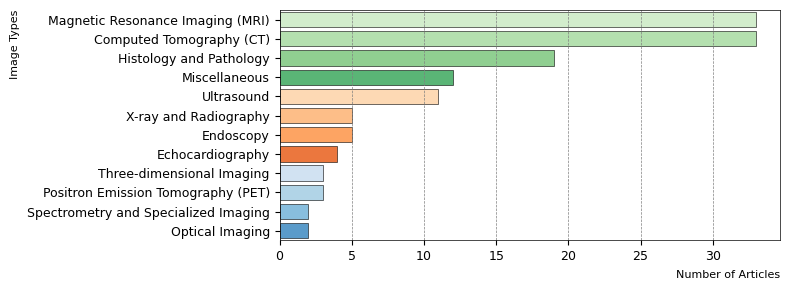

In [339]:
colors = plt.cm.tab20c.colors  # Or any other colormap that you like

# Create a new dataframe where each row has only one category
# by splitting the 'organ_category_refined' column and then using explode()
df_expanded = df1['image_category'].str.split(', ').explode().reset_index(drop=True)

# Now group by the expanded categories and count occurrences
image_counts = df_expanded.groupby(df_expanded).count().sort_values()

# Horizontal bar chart
plt.figure(figsize=(8, 3))
image_counts.sort_values(ascending=True).plot(kind='barh', color=colors, edgecolor='black', linewidth=0.5, alpha=0.8, width=0.8)
#plt.title('Distribution of Image Types Across Papers')
plt.xlabel('Number of Articles', fontsize=8, labelpad=5, loc='right')
plt.ylabel('Image Types', fontsize=8, labelpad=5, loc='top')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.ylim(-0.5, 11.5)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()  
plt.savefig('image_types.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

### Demographics
***

This code adds a new column demographics_usage to the dataframe, categorizing each paper based on how extensively it uses demographic information according to a criteria. This approach provides a clear, easy-to-understand categorization based on the presence and count of demographic information in the dataset descriptions.

**Criteria**

To aggregate the counts of demographics across four columns (age, gender, ethnicity, geolocation) into one category (demographics) with levels indicating the extent of demographics usage in papers, I have created 3 different categories:

1. No Demographic Data: For papers that do not use demographic information at all.
2. Limited Use of Demographic Data: For papers that use some demographic information, indicating a moderate level of usage.
3. Extensive Use of Demographic Data: For papers that use a lot of demographic information, indicating a high level of usage.

In [329]:
# Define the aggregation function
def aggregate_demographics(row):
    # Count the number of demographic indicators used (sum of 1s across the 4 columns)
    count = row['age'] + row['sex/gender'] + row['ethnicity'] + row['geographical location ']
    if count == 0:
        return 'No Demographic Data'
    elif 1 <= count <= 2:
        return 'Limited Use of Demographic Data'
    else:
        return 'Extensive Use of Demographic Data'

In [10]:
# Apply the function across each row
df1['demographics_usage'] = df1.apply(aggregate_demographics, axis=1)
df1[['title', 'age', 'sex/gender', 'ethnicity', 'geographical location ', 'demographics_usage']].head() # Preview the updated DataFrame
#df1.drop(columns=['age', 'sex/gender', 'ethnicity', 'geographical location '], inplace=True) # Drop the individual columns

NameError: name 'aggregate_demographics' is not defined

#### Demographics analysis
***

/var/folders/bn/qvp15lc54w559qnxjpvy0bzw0000gn/T/ipykernel_83170/4102927301.py:27: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0,0),1,1, color=colors[i % len(colors)], edgecolor='black') for i in range(len(category_names))]


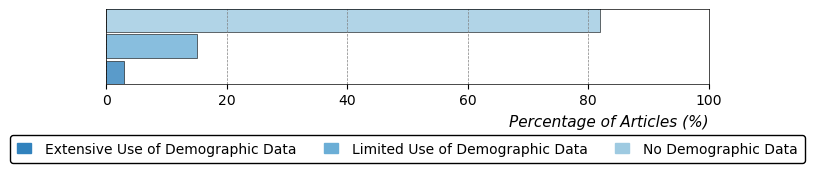

In [332]:
# Create a new dataframe where each row has only one category
# by splitting the 'demographics_usage' column and then using explode()
df_expanded = df1['demographics_usage'].str.split(', ').explode().reset_index(drop=True)

# Now group by the expanded categories and count occurrences
demo_counts = df_expanded.groupby(df_expanded).count().sort_values()

# Convert counts to percentages
total_count = demo_counts.sum()
demo_percentages = (demo_counts / total_count) * 100

# Horizontal bar chart
plt.figure(figsize=(6.5, 1.5))
demo_percentages.plot(kind='barh', color=colors, edgecolor='black', linewidth=0.5, alpha=0.8, width=0.9)

plt.xlabel('Percentage of Articles (%)', fontsize=11, labelpad=5, loc='right', style='italic').set_visible(True)
plt.ylabel('Demographics Usage', fontsize=11, labelpad=5, loc='bottom', style='italic').set_visible(False)

# Removing y-axis labels by setting y-tick labels to an empty list
plt.yticks([])
plt.grid(axis='x', linestyle='--')
plt.xlim(0, 100)  # Set x limits to percentage scale (0-100)
plt.ylim(-0.4, 2.4)
plt.tight_layout()

# Optional: Adding a legend if you have multiple categories with different colors
category_names = demo_percentages.index.tolist()
legend_handles = [plt.Rectangle((0,0),1,1, color=colors[i % len(colors)], edgecolor='black') for i in range(len(category_names))]
plt.legend(handles=legend_handles, labels=category_names, fontsize='10', loc='upper center', 
           frameon=True, edgecolor='black', fancybox=True, ncol=3, bbox_to_anchor=(0.5, -0.6), framealpha=1,  borderpad=0.5, labelspacing=0.3,
           handlelength=1., handletextpad=1.)

plt.savefig('demographics_usage_percentage.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


### Datasets
***

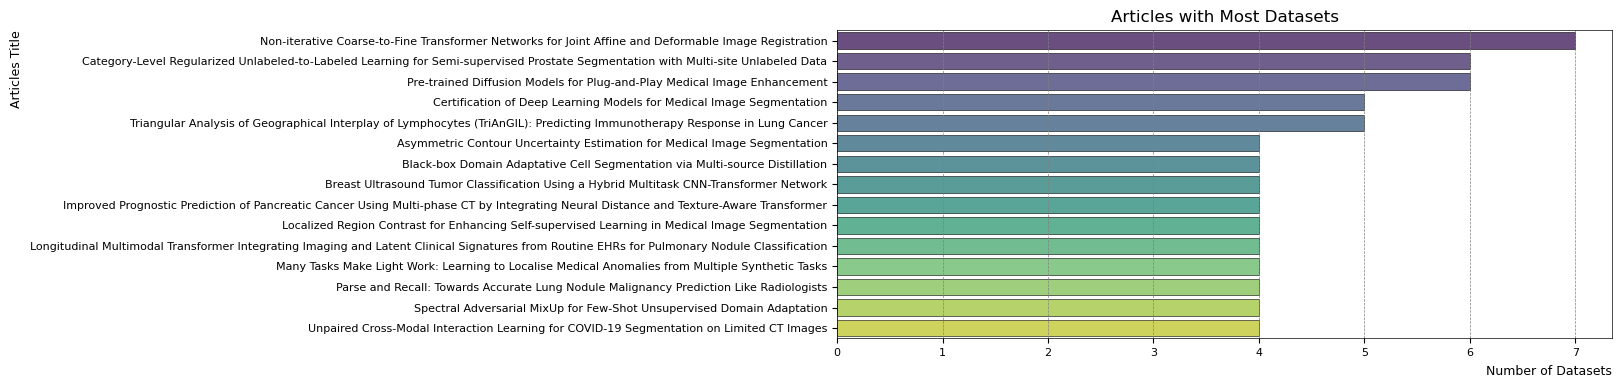

In [334]:
# Bar Chart for Papers with Most Datasets
plt.figure(figsize=(10, 4))
most_datasets = df1[df1['dataset quantity'] >= 4]  # Arbitrary threshold
sns.barplot(x='dataset quantity', y='title', data=most_datasets.sort_values(by='dataset quantity', ascending=False), palette='viridis', 
            edgecolor='black', linewidth=0.5, alpha=0.8, errorbar=None, orient='h', hue='title')
plt.title('Articles with Most Datasets')
plt.xlabel('Number of Datasets', fontsize=9, labelpad=5, loc='right')
plt.ylabel('Articles Title', fontsize=9, labelpad=5, loc='top')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='x', linestyle='--')
plt.show()

#### Dataset disclosure
1. Full Disclosure: All datasets are accounted for as either public or private.
2. Partial Disclosure: Some datasets are mentioned as public or private, but not all (the total number of datasets exceeds the sum of public and private ones mentioned)
3. No Disclosure: datasets are not mentioned as public or private, or the status of all datasets is undisclosed. 
4. No Mentions of Datasets: The sentence extraction does not provide any information of whether the datasets are private and/or public

In [335]:
def categorize_disclosure(row):
    # Handle the case where no datasets are used
    if row['dataset quantity'] == 0:
        return 'Quantities Undisclosed'
    
    # Convert public and private dataset counts to numeric, setting errors to NaN for non-numeric values
    public_count = pd.to_numeric(row['quantity of public datasets'], errors='coerce')
    private_count = pd.to_numeric(row['quantity of private datasets'], errors='coerce')
    
    # Check if both public and private dataset counts are zero or NaN
    if (public_count == 0 and private_count == 0) and row['dataset quantity'] > 0:
        return 'Status Undisclosed' 
    
    # Check for full disclosure
    if (public_count != 0 or private_count != 0) and (public_count + private_count == row['dataset quantity']):
        return 'Full Disclosure'
    
    # Check for partial disclosure
    #if (public_count > 0 and private_count == 0) and (public_count + private_count < row['dataset quantity']):        
    if (public_count > 0 and private_count == 0) and row['dataset quantity'] > public_count + private_count:
        return 'Partial Disclosure'
    
    if (public_count == 0 and private_count > 0) and row['dataset quantity'] > public_count + private_count:
        return 'Partial Disclosure'

    # Default case when dataset status is not disclosed properly
    return 'Status Undisclosed'

In [336]:
# Apply the function to each row
df1['dataset_disclosure_category'] = df1.apply(categorize_disclosure, axis=1)

# Display the DataFrame with the new disclosure category
df1[['title', 'dataset quantity', 'quantity of public datasets', 'quantity of private datasets', 'dataset_disclosure_category']]
#df1.drop(columns=['quantity of public datasets', 'quantity of private datasets'], inplace=True)
#df1.to_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/cleaned_new_annotations_final.csv', index=False)

,title,dataset quantity,quantity of public datasets,quantity of private datasets,dataset_disclosure_category
0,3D Arterial Segmentation via Single 2D Project...,1,0,1,Full Disclosure
1,A Multi-task Network for Anatomy Identificatio...,1,0,0,Status Undisclosed
2,A Texture Neural Network to Predict the Abnorm...,1,0,0,Status Undisclosed
3,ALL-IN: A Local GLobal Graph-Based DIstillatio...,3,2,0,Partial Disclosure
4,AME-CAM: Attentive Multiple-Exit CAM for Weakl...,1,0,0,Status Undisclosed
...,...,...,...,...,...
95,Triangular Analysis of Geographical Interplay ...,5,0,5,Full Disclosure
96,Uncertainty-Informed Mutual Learning for Joint...,2,2,0,Full Disclosure
97,Unpaired Cross-Modal Interaction Learning for ...,4,2,0,Partial Disclosure
98,VesselVAE: Recursive Variational Autoencoders ...,1,1,0,Full Disclosure


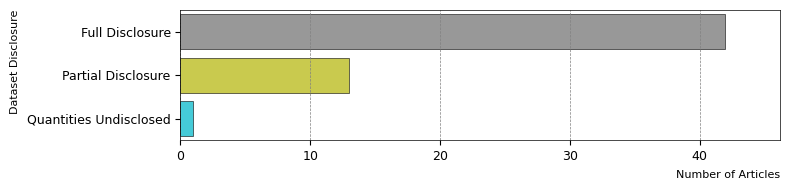

In [337]:
colors = plt.cm.tab10_r.colors

# Create a new dataframe where each row has only one category
# by splitting the 'organ_category_refined' column and then using explode()
df_expanded = df1['dataset_disclosure_category'].str.split(', ').explode().reset_index(drop=True)

# Now group by the expanded categories and count occurrences
dataset_counts = df_expanded.groupby(df_expanded).count().sort_values()

# Horizontal bar chart
plt.figure(figsize=(8, 2))
dataset_counts.plot(kind='barh', color=colors, edgecolor='black', linewidth=0.5, alpha=0.8, width=0.8)
#plt.title('Distribution of Dataset Disclosure Across Papers')
plt.xlabel('Number of Articles', fontsize=8, labelpad=5, loc='right')
plt.ylabel('Dataset Disclosure', fontsize=8, labelpad=5, loc='top')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='x', linestyle='--')
plt.ylim(-0.5, 2.5)
plt.savefig('dataset_disclosure.png', dpi=300, bbox_inches='tight', transparent=True)
plt.tight_layout()  

In [338]:
def categorize_dataset_status(row):
    if row['dataset quantity'] == 0:
        return 'None'
    elif row['quantity of public datasets'] == row['dataset quantity']:
        return 'All Public'
    elif row['quantity of private datasets'] == row['dataset quantity']:
        return 'All Private'
    elif row['quantity of public datasets'] > 0 and row['quantity of private datasets'] > 0:
        return 'Public and Private'
    elif row['quantity of public datasets'] > 0 and row['quantity of private datasets'] == 0:
        return 'Some Public Some Unknown'
    elif row['quantity of public datasets'] == 0 and row['quantity of private datasets'] > 0:
        return 'Some Private Some Unknown'
    else:
        return 'Unknown'  # This covers cases where dataset quantities do not sum up correctly or are not specified.

# Apply the function to each row
df1['dataset_status'] = df1.apply(categorize_dataset_status, axis=1)

# Now group by the new 'dataset_status' column to get counts
dataset_status_counts = df1['dataset_status'].value_counts()

# Old code
***

### Packages and style settings 
***

In [250]:
from matplotlib import colormaps
import matplotlib as mpl

COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['grid.color'] = 'grey'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['figure.facecolor'] = 'white'


#print(list(colormaps))
# Color palettes
# ['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 
# 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r','Accent_r', 'Dark2_r', 'Paired_r', 'Pastel1_r', 'Pastel2_r', 'Set1_r', 'Set2_r', 
# 'Set3_r', 'tab10_r', 'tab20_r', 'tab20b_r', 'tab20c_r']

#print(plt.style.available)
#plt.style.use('tableau-colorblind10')
#plt.style.use(['dark_background'])

In [251]:
#!pip install pandas openpyxl
import os
import re
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from numpy import stack
import seaborn as sns
from sympy import li

### Load and Read file with Annotations
***

In [252]:
# Load the Excel file
file_path = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/annotation_data/new_annotations_final.xlsx'

# Read the sheets into separate DataFrames
df1 = pd.read_excel(file_path, sheet_name='100_annotations').drop(columns=['notes','links/sup material '])
print('The  Number of Unique Titles:', len(df1['title'].unique()))

df1.head()

The  Number of Unique Titles: 100


,title,paper name,vol,Does the article contain any of these keywords: cancer/tumor/tumour?,Study subject labelled as ‘patient/patients’ in dataset(s),age,sex/gender,ethnicity,geographical location,dataset quantity,...,location,location as a healthcare facility,name of healthcare facility,location as other (center/department/laboratory/university/institution/online),name of location as other (center/department/laboratory/university/institution/online),location as large-scale geographical entity,name of location as large-scale geographical entity,location as subnational geographical entity,name of location as subnational geographical entity,Information found outside article (such as sup material and/or by references
0,3D Arterial Segmentation via Single 2D Project...,14,1,1,1,0,1,0,0,1,...,0,0,No Name,0,No Name,0,No Name,0,No Name,1
1,A Multi-task Network for Anatomy Identificatio...,45,9,1,1,0,0,0,0,1,...,1,1,national hospital of neurology and neurosurgery,0,No Name,1,united kingdom,1,london,1
2,A Texture Neural Network to Predict the Abnorm...,46,8,1,1,1,1,0,0,1,...,1,1,anonymous,0,No Name,0,No Name,0,No Name,0
3,ALL-IN: A Local GLobal Graph-Based DIstillatio...,74,3,1,1,0,0,0,0,3,...,0,0,No Name,0,No Name,0,No Name,0,No Name,1
4,AME-CAM: Attentive Multiple-Exit CAM for Weakl...,17,1,1,1,0,0,0,0,1,...,0,0,No Name,0,No Name,0,No Name,0,No Name,1


In [253]:
# Extract unique organs and image types
organs = (df1['organ/body part in datasets'].unique()).tolist()

final = []
for value in organs:
    organ = value.split(",")
    organ = value.split(",")
    organ = [x.strip() for x in organ]
    final.append(tuple(organ))

# list of unique organs
initial_unique_organs = [y for x in final for y in x]
print(initial_unique_organs)

# Extract unique image types
image_types = (df1['image type in datasets'].unique()).tolist()

final = []
for value in image_types:
    image_type = value.split(",")
    image_type = [x.strip() for x in image_type]
    final.append(tuple(image_type))

# list of unique image types
initial_unique_image_types = [y for x in final for y in x]
print(initial_unique_image_types)

# Count the number of occurrences of each organ and image type
initial_organ_counts = df1['organ/body part in datasets'].str.split(',').explode().str.strip().value_counts()
initial_image_type_counts = df1['image type in datasets'].str.split(',').explode().str.strip().value_counts()

['abdomen', 'pancreas', 'pituitary gland', 'breast', 'prostate', 'brain', 'head and neck', 'h&n', 'breast', 'colon', 'prostate', 'thyroid', 'chest', 'heart', 'chest', 'lung', 'lung', 'stomach', 'abdomen', 'brest', 'kidney', 'renal', 'colorectal', 'colorectal', 'chest', 'lung', 'heart', 'skin', 'colon', 'stomach', 'stroma', 'prostate', 'lymp nodes', 'no organ mentioned', 'skin', 'prostate', 'brain', 'abdomen', 'kidney', 'liver', 'rectum', 'bladder', 'femoral head', 'small intestine', 'brain', 'abdomen', 'pelvic region', 'prostate', 'liver', 'liver', 'hepatic', 'liver', 'oropharynx', 'head and neck', 'brain', 'cerebral', 'gallbladder', 'whole body', 'lung', 'liver', 'spleen', 'lung', 'pancreas', 'liver', 'breast', 'thorax', 'lung', 'liver', 'gallbladder', 'hepatic vein', 'spleen', 'stomach', 'pancreas', 'abdomen', 'thorax', 'head and neck', 'lung', 'chest', 'brain', 'chest', 'head and neck', 'h&n', 'lymp nodes', 'lung', 'liver', 'lung', 'lymp nodes', 'head and neck', 'renal', 'breast', '

In [254]:
unique_organs = organ_counts.index.tolist()
unique_organs_df = pd.DataFrame(unique_organs, columns=['organ'])
unique_organs_df['count'] = organ_counts.values
unique_organs_df['percentage'] = (organ_counts.values / organ_counts.sum()) * 100
unique_organs_df.to_csv('unique_organs.csv', index=False)

unique_image_types = image_type_counts.index.tolist()
unique_image_types_df = pd.DataFrame(unique_image_types, columns=['image type'])
unique_image_types_df['count'] = image_type_counts.values
unique_image_types_df['percentage'] = (image_type_counts.values / image_type_counts.sum()) * 100
unique_image_types_df.to_csv('unique_image_types.csv', index=False)

### Organ types
***

1) Original Category: The list of organs from the annotations are divided into main categories of the body, based on anatomical regions and organ systems.
***

| Category                     | Organ Types                                                                                                      |
|------------------------------|------------------------------------------------------------------------------------------------------------------|
| **Central Nervous System**   | brain, human brain, cerebral, brainstem, spinal cord, cells, optical chiasm, left optical nerve, right optical nerve, eye, brainstem |
| **Head and Neck**            | head, neck, head and neck, h&n, mandible, left parotid, right parotid, left submandibular gland, right submandibular gland                |
| **Cardiovascular System**    | heart, vein                                                                                                      |
| **Respiratory System**       | chest, lung, left lung, right lung, heart, thorax, esophagus, trachea                                            |
| **Digestive System**         | liver, stomach, gallbladder, hepatic, large bowel, duodenum, small bowel, abdomen, colon, colon tissue, gastro, hepatic, colorectal         |
| **Lymphatic System**         | lymph nodes, spleen                                                                                              |
| **Musculoskeletal System**   | musculoskeletal system                                                                                           |
| **Integumentary System**     | skin, hair, nails                                                                                                |
| **Endocrine System**         | thyroid, pituitary gland, pancreas                                                                               |
| **Whole Body**               | whole body                                                                                                       |
| **Genitourinary System**     | genitourinary system, pelvic region, pelvis, kidney, left kidney, right kidney, bladder                           |
| **Male Reproductive System** | penis, prostate, testes                                                                                           |
| **Female Reproductive System** | cervix, uterus, mammary glands, ovaries, breast                                                                 |
| **No Organ Mentioned**       | no organ mentioned, 0                                                                                            |
| **Zoology**                   | swine liver, monkey brain                                                                                        |


In [255]:
organ_types_by_category = {
    "Central Nervous System"    : ['brain', 'human brain', 'cerebral', 'brainstem', 'spinal cord', 'cells', 'optical chiasm', 'left optical nerve', 
                                   'right optical nerve', 'eye', 'brainstem'],
    "Head and Neck"             : ['head', 'neck', 'head and neck', 'h&n','mandible',  'left parotid', 'right parotid', 'left submandibular gland', 'right submandibular gland'],
    "Cardiovascular System"     : ['heart', 'vein'],
    "Respiratory System"        : ['chest', 'lung', 'left lung', 'right lung', 'heart', 'thorax', 'esophagus', 'trachea'],
    "Digestive System"          : ['liver', 'stomach', 'gallbladder', 'hepatic', 'large bowel', 'duodenum', 'small bowel', 
                                   'abdomen', 'colon', 'colon tissue', 'gastro', 'hepatic vein', 'colorectal'],
    "Lymphatic System"          : ['lymph nodes', 'lymp nodes', 'spleen'],
    "Musculoskeletal System"    : ['musculoskeletal system'],
    "Integumentary System"      : ['skin', 'hair', 'nails'],
    "Endocrine System"          : ['thyroid', 'pituitary gland', 'pancreas'],
    "Whole Body"                : ['whole body', 'tissue'],
    "Genitourinary System"      : ['genitourinary system', 'pelvic region', 'pelvis', 'kidney', 'left kidney', 'right kidney', 'bladder', 'renal'],
    "Male Reproductive System"  : ['penis', 'prostate', 'testes'],
    "Female Reproductive System": ['cervix', 'uterus', 'mammary glands', 'ovaries', 'breast'],
    'No Organ Mentioned'        : ['no organ mentioned', '0'],
    "Zoology"                   : ['swine liver', 'monkey brain']
}

# Function to categorize each value and return the set of categories
def categorize_row(row):
    # Split the row by comma and strip spaces
    organ_types = [x.strip() for x in row.split(',')]
    # Initialize a set to hold unique categories for this row
    row_categories = set()
    for organ_type in organ_types:
        # Check each category for a match and add to the set
        for category, types in organ_types_by_category.items():
            if organ_type in types:
                row_categories.add(category)
                break
    # Return a comma-separated string of unique categories or a single category
    return ', '.join(row_categories) if row_categories else 'Uncategorized'

# Apply the categorization function to each row in the DataFrame
df1['organ_category'] = df1['organ/body part in datasets'].apply(categorize_row)

In [256]:
# colors = plt.cm.Set3_r.colors  # Or any other colormap that you like


# # Create a new dataframe where each row has only one category
# # by splitting the 'organ_category' column and then using explode()
# df_expanded = df1['organ_category'].str.split(', ').explode().reset_index(drop=True)

# # Now group by the expanded categories and count occurrences
# organ_counts = df_expanded.groupby(df_expanded).count().sort_values()

# # Horizontal bar chart
# plt.figure(figsize=(6, 4))
# organ_counts.plot(kind='barh', color=colors)
# plt.title('Distribution of Organs Across Papers')
# plt.xlabel('Number of Papers')
# plt.ylabel('Organ Category').set_visible(False)
# plt.grid(axis='x', linestyle='--')
# plt.tight_layout()  
# plt.show()

***
Option 2) Refining the dataframe: the categorize_row function returns a list of categories instead of a comma-separated string. After applying this function, the DataFrame will have a column where each row is a list of categories. Next, using explode on that column which will create a new row in the DataFrame for each element in the list, duplicating the other row information.

In [257]:
organ_types_by_category = {
    "Central Nervous System"    : ['brain', 'human brain', 'cerebral', 'brainstem', 'spinal cord', 'cells', 'optical chiasm', 'left optical nerve', 
                                   'right optical nerve', 'eye', 'brainstem'],
    "Head and Neck"             : ['head', 'neck', 'head and neck', 'h&n','mandible',  'left parotid', 'right parotid', 'left submandibular gland', 'right submandibular gland'],
    "Cardiovascular System"     : ['heart', 'vein', 'arterial', 'blood vessels'],
    "Respiratory System"        : ['chest', 'lung', 'left lung', 'right lung', 'heart', 'thorax', 'esophagus', 'trachea'],
    "Digestive System"          : ['liver', 'stomach', 'gallbladder', 'hepatic', 'large bowel', 'duodenum', 'small bowel', 
                                   'abdomen', 'colon', 'colon tissue', 'gastro', 'hepatic vein', 'colorectal', 'rectum', 'small intestine'],
    "Lymphatic System"          : ['lymph nodes', 'lymp nodes', 'spleen', 'auxillary'],
    "Musculoskeletal System"    : ['musculoskeletal system', 'femoral head', 'Musculoskeletal'],
    "Integumentary System"      : ['skin', 'hair', 'nails'],
    "Endocrine System"          : ['thyroid', 'pituitary gland', 'pancreas'],
    "Whole Body"                : ['whole body', 'tissue', 'stroma'],
    "Genitourinary System"      : ['genitourinary system', 'pelvic region', 'pelvis', 'pelvic', 'kidney', 'left kidney', 'right kidney', 'bladder', 'renal'],
    "Male Reproductive System"  : ['penis', 'prostate', 'testes'],
    "Female Reproductive System": ['cervix', 'uterus', 'mammary glands', 'ovaries', 'breast'],
    'No Organ Mentioned'        : ['no organ mentioned', '0'],
    "Zoology"                    : ['swine liver', 'monkey brain']
}

# Function to categorize each value and return a list of categories
def categorize_row(row):
    # Split the row by comma and strip spaces
    organ_types = [x.strip() for x in row.split(',')]
    # Initialize a list to hold unique categories for this row
    row_categories = []
    for organ_type in organ_types:
        # Check each category for a match and append to the list
        for category, types in organ_types_by_category.items():
            if organ_type in types and category not in row_categories:
                row_categories.append(category)
    # Return the list of categories or ['Uncategorized'] if none are found
    return row_categories if row_categories else ['Uncategorized']

# Apply the categorization function to each row in the DataFrame
df1['organ_category'] = df1['organ/body part in datasets'].apply(categorize_row)

# Now explode the DataFrame to have a separate row for each category
df1_exploded = df1.explode('organ_category').reset_index(drop=True)

However, previous code made duplicate rows for papers with more than one organ category. To solve this issue, we have defined a function check_category_presence that checks if any organ from the row's organ list is present in each category.

It then applies this function to the DataFrame, creating a dictionary for each row with True/False values indicating the presence of each category.
It iterates over each category and creates a new column in df1 for that category, setting the value based on the presence of the category.
Optionally, it converts boolean values to binary (1/0) for a more typical binary indicator format.

In [258]:
# Function to check presence of each category in the row
def check_category_presence(organ_types, category_list):
    presence_dict = {}
    for category in category_list:
        presence_dict[category] = any(organ in organ_types_by_category[category] for organ in organ_types)
    return presence_dict

# List of all categories
all_categories = list(organ_types_by_category.keys())

# Split the 'organ/body part in datasets' column and apply the function
df1['organ_types'] = df1['organ/body part in datasets'].str.split(', ')
category_presence = df1['organ_types'].apply(lambda organs: check_category_presence(organs, all_categories))

# Now create a column for each category based on presence
for category in all_categories:
    df1[category] = category_presence.apply(lambda x: x[category])

# Bbinary indicators, convert the True/False to 1/0
df1[all_categories] = df1[all_categories].astype(int)

# df1 now has an extra column for each category without duplicating rows
df1.head()

,title,paper name,vol,Does the article contain any of these keywords: cancer/tumor/tumour?,Study subject labelled as ‘patient/patients’ in dataset(s),age,sex/gender,ethnicity,geographical location,dataset quantity,...,Lymphatic System,Musculoskeletal System,Integumentary System,Endocrine System,Whole Body,Genitourinary System,Male Reproductive System,Female Reproductive System,No Organ Mentioned,Zoology
0,3D Arterial Segmentation via Single 2D Project...,14,1,1,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,A Multi-task Network for Anatomy Identificatio...,45,9,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,A Texture Neural Network to Predict the Abnorm...,46,8,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,ALL-IN: A Local GLobal Graph-Based DIstillatio...,74,3,1,1,0,0,0,0,3,...,0,0,0,0,0,0,1,0,0,0
4,AME-CAM: Attentive Multiple-Exit CAM for Weakl...,17,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### Organ distribution analysis: Main Categories
***

In [259]:
# colors = plt.cm.Set3_r.colors  # Or any other colormap that you like


# # Summing up each category column to get the total counts for each category
# category_counts = df1[list(organ_types_by_category.keys())].sum().sort_values()

# # Creating a bar chart
# plt.figure(figsize=(5, 4))
# category_counts.plot(kind='barh', color=colors)
# #plt.title('Frequency of Organ Categories')
# plt.xlabel('Number of Papers')
# plt.ylabel('Organ Category').set_visible(False)
# plt.grid(axis='x', linestyle='--')
# plt.show()


### Broader organ categories
***

| Broad Category                               | Subcategories                              | Specific Organs                                                                                                   |
|----------------------------------------------|--------------------------------------------|-------------------------------------------------------------------------------------------------------------------|
| **Central and Peripheral Nervous System**    | Central Nervous System, Head and Neck      | Brain, spinal cord, optical chiasm, left optical nerve, right optical nerve, eye, brainstem, head, neck, mandible, left parotid, right parotid, left submandibular gland, right submandibular gland |
| **Circulatory and Respiratory Systems**      | Cardiovascular System, Respiratory System  | Heart, veins, chest, lungs, left lung, right lung, thorax, esophagus, trachea                                      |
| **Digestive and Excretory Systems**          | Digestive System, Genitourinary System     | Liver, stomach, gallbladder, hepatic vein, large bowel, duodenum, small bowel, abdomen, colon, colon tissue, gastro, hepatic, colorectal, pelvic region, pelvis, kidney, left kidney, right kidney, bladder, renal |
| **Structural and Protective Systems**        | Musculoskeletal System, Integumentary System| Musculoskeletal system, skin, hair, nails                                                                         |
| **Regulatory Systems**                       | Endocrine System, Lymphatic System         | Thyroid, pituitary gland, pancreas, lymph nodes, spleen                                                            |
| **Reproductive Systems**                     | Male Reproductive System, Female Reproductive System | Penis, prostate, testes, cervix, uterus, ovaries, mammary glands, breast                                            |
| **Whole Body and Non-Specific**              | Whole Body, No Organ Mentioned             | Whole body studies, cells, tissue, papers not mentioning specific organs                                           |
| **Zoology**                                  | Zoology                                    | Swine liver, monkey brain                                                                                         |


In [260]:
organ_types_by_category = {
    "Central and Peripheral Nervous System"     : ['brain', 'human brain', 'cerebral', 'brainstem', 'spinal cord', 'cells', 'optical chiasm', 
                                                  'left optical nerve', 'right optical nerve', 'eye', 'brainstem', 'head', 'neck', 'head and neck', 
                                                  'h&n','mandible',  'left parotid', 'right parotid', 'left submandibular gland', 
                                                  'right submandibular gland'],
    "Circulatory and Respiratory Systems"       : ['heart', 'vein', 'chest', 'lung', 'left lung', 'right lung', 'heart', 'thorax', 'esophagus', 
                                                  'trachea', 'arterial', 'blood vessels'],
    "Digestive and Excretory Systems"            : ['liver', 'stomach', 'gallbladder', 'hepatic', 'hepatic vein', 'large bowel', 'duodenum', 'small bowel', 'abdomen', 
                                                   'colon', 'colon tissue', 'gastro', 'hepatic', 'colorectal', 'genitourinary system', 'pelvic region',
                                                   'pelvis', 'kidney', 'left kidney', 'right kidney', 'bladder', 'renal', 'rectum', 'small intestine'],
    "Regulatory Systems"                        : ['lymph nodes', 'lymp nodes', 'spleen', 'thyroid', 'pituitary gland', 'pancreas', 'auxillary'],
    "Structural and Protective Systems"         : ['musculoskeletal system', 'skin', 'hair', 'nails', 'femoral head', 'Musculoskeletal'],
    "Whole Body"                                : ['whole body', 'cells', 'tissue', 'stroma'],
    "Male Reproductive System"                  : ['penis', 'prostate', 'testes'],
    "Female Reproductive System"                : ['cervix', 'uterus', 'mammary glands', 'ovaries', 'breast'],
    'No Organ Mentioned'                        : ['no organ mentioned', '0'],
    "Zoology"                                   : ['swine liver', 'monkey brain']
}

# Function to categorize each value and return the set of categories
def categorize_row(row):
    # Split the row by comma and strip spaces
    organ_types = [x.strip() for x in row.split(',')]
    # Initialize a set to hold unique categories for this row
    row_categories = set()
    for organ_type in organ_types:
        # Check each category for a match and add to the set
        for category, types in organ_types_by_category.items():
            if organ_type in types:
                row_categories.add(category)
                break
    # Return a comma-separated string of unique categories or a single category
    return ', '.join(row_categories) if row_categories else 'Uncategorized'

# Apply the categorization function to each row in the DataFrame
df1['organ_category_refined'] = df1['organ/body part in datasets'].apply(categorize_row)

#### Organ distribution analysis: Broader Categories
***

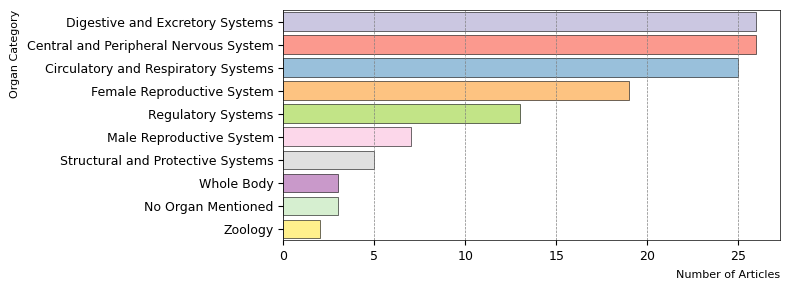

In [261]:
colors = plt.cm.Set3_r.colors  # Or any other colormap that you like


# Create a new dataframe where each row has only one category
# by splitting the 'organ_category_refined' column and then using explode()
df_expanded = df1['organ_category_refined'].str.split(', ').explode().reset_index(drop=True)

# Now group by the expanded categories and count occurrences
organ_counts = df_expanded.groupby(df_expanded).count().sort_values()

# Horizontal bar chart
plt.figure(figsize=(8, 3))
organ_counts.plot(kind='barh', color=colors,  edgecolor='black', linewidth=0.5, alpha=0.8, width=0.8)
plt.xlabel('Number of Articles', fontsize=8, labelpad=5, loc='right')
plt.ylabel('Organ Category', fontsize=8, labelpad=5, loc='top')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.ylim(-0.5, 9.5)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()  # This will make sure that labels and titles fit into the figure nicely
plt.savefig('organ_category_refined.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


### Image types
***

The list of image types from the annotations are divided into main categories of the body, based on the imaging technique, purpose, or the type of information they provide

| Category                             | Image Types                                                                                                      |
|--------------------------------------|------------------------------------------------------------------------------------------------------------------|
| **Magnetic Resonance Imaging (MRI)** | mri, t1, t2, flair, dwi, dce-mri, fmri, mr, tractography, mr t1 volumes, mr t2 volumes, magnetic resonance, mr-ct |
| **Computed Tomography (CT)**         | ct, nc-ct, dce-ct, ct volumes, contrast-enhanced abdominal computed tomography images, computed tomography, pet/ct, cbct, ct |
| **Ultrasound**                       | ultrasound, ceus, intra-operative ultrasound, intra-operative us, us, ultrasound volumes, intra-operative ultrasound volumes, ius |
| **Positron Emission Tomography (PET)** | pet, pet/ct                                                                                                      |
| **Endoscopy**                        | gastroscopy, endoscopy, colonoscopy, laparoscopy                                                                |
| **Optical Imaging**                  | fundus, optical coherence tomography, oct, rgb dermatocopy                                                      |
| **X-ray and Radiography**            | xray, x-rays                                                                                                     |
| **Histology and Pathology**          | histopathology, h&e, wsi, wsis, tissue microarrays, biopsy slides, stained image tiles, histology images         |
| **Spectrometry and Specialized Imaging** | intra-operative spectrometry, tomography, multiplex staining, ihc, if                                           |
| **Echocardiography**                 | 2d echocardigrams, echocardiograms                                                                               |
| **Three-dimensional Imaging**        | 3d camera, 3d                                                                                                    |
| **Miscellaneous**                    | segmentation, segmentations, mte, dmri, image titles                                                             |


In [262]:
# Image types: Adding a new column to the new DataFrame with the categorized values 
# Function to categorize values
# image_types_by_category = {
#     "Magnetic Resonance Imaging (MRI)"      : ["mri", "t1", "t2", "flair", "dwi", "dce-mri", "fmri", "mr", "tractography", 
#                                                "mr t1 volumes", "mr t2 volumes", "magnetic resonance", "mr-ct", 'mr t1 volumes'],
#     "Computed Tomography (CT)"              : [ "ct", "nc-ct", "dce-ct", 'cts', "ct volumes", "contrast-enhanced abdominal computed tomography images", 
#                                                "computed tomography", "pet/ct", "cbct", "ct", 'TMAs', 'tmas', 'tomography'],
#     "Ultrasound"                            : ["ultrasound",'us', 'us volumes','ultrasounds', "ceus", "intra-operative ultrasound",'ius', "intra-operative us", "us", 
#                                                "ultrasound volumes", "intra-operative ultrasound volumes", "intraoperative ultrasound", "ius"],    
#     "Positron Emission Tomography (PET)"    : ["pet", "pet/ct", 'Positron Emission Tomography'],
#     "Endoscopy"                             : ["gastroscopy", "endoscopy", "colonoscopy", "laparoscopy", "endoscope"],
#     "Optical Imaging"                       : ["fundus", "optical coherence tomography", "oct", "rgb dermatocopy"],
#     "X-ray and Radiography"                 : ["xray", "x-rays", "x-ray" ],
#     "Histology and Pathology"               : ["histopathology", "h&e", "wsi", "wsis", "tissue microarrays", "biopsy slides", 
#                                                "stained image tiles", "histology images", 'h&e stained', 'h&e stained whole slide images'],
#     "Spectrometry and Specialized Imaging"  : ["intra-operative spectrometry", "tomography", "multiplex staining", "ihc", "if"],
#     "Echocardiography"                      : ["2d echocardigrams", "echocardiograms", '2d', '2d mra'],
#     "Three-dimensional Imaging"             : ["3d camera", "3d"],
#     "Miscellaneous"                         : ["segmentation", "segmentations", "mte", "dmri", "image titles"]
# }

image_types_by_category = {
    "Magnetic Resonance Imaging (MRI)":     ["mri", "t1", "t2", "flair", "dwi", "dce-mri", "fmri", "mr", "tractography",
                                            "mr t1 volumes", "mr t2 volumes", "magnetic resonance", "mr-ct", 'mr t1 volumes', "t1ce", 
                                            "flim", "multispectral fluorescence lifetime imaging", "dwi", "mr t1", "t1", "t2"],
    "Computed Tomography (CT)":             ["ct", "nc-ct", "dce-ct", "cts", "ct volumes", "contrast-enhanced abdominal computed tomography images",
                                            "computed tomography", "pet/ct", "cbct", "ct", 'TMAs', 'tmas', 'tomography', 'ct', 'cect', 'ncct', 'cbct'],
    "Ultrasound":                           ["ultrasound", 'us', 'us volumes', 'ultrasounds', "ceus", "intra-operative ultrasound", 'ius', "intra-operative us", "us",
                                            "ultrasound volumes", "intra-operative ultrasound volumes", "intraoperative ultrasound", "ius", "Ultrasound Elastography"],
    "Positron Emission Tomography (PET)":   ["pet", "pet/ct", 'Positron Emission Tomography'],
    "Endoscopy":                            ["gastroscopy", "endoscopy", "colonoscopy", "laparoscopy", "endoscope"],
    "Optical Imaging":                      ["fundus", "optical coherence tomography", "oct", "rgb dermatocopy"],
    "X-ray and Radiography":                ["xray", "x-rays", "x-ray"],
    "Histology and Pathology":              ["histopathology", "h&e", "wsi", "wsis", "tissue microarrays", "biopsy slides",
                                            "stained image tiles", "histology images", 'h&e stained', 'h&e stained whole slide images', "whole mount slides", "slides"],
    "Spectrometry and Specialized Imaging": ["intra-operative spectrometry", "tomography", "multiplex staining", "ihc", "if"],
    "Echocardiography":                     ["2d echocardigrams", "echocardiograms", '2d', '2d mra'],
    "Three-dimensional Imaging":            ["3d camera", "3d", "photogrammetry 3d"],
    "Miscellaneous":                        ["segmentation", "segmentations", "mte", "dmri", "image titles", "no image type mentioned", "tors", "transoral robotic surgery", "ehr"]
}

# Function to categorize each value and return the set of categories
def categorize_row(row):
    # Split the row by comma and strip spaces
    image_types = [x.strip() for x in row.split(',')]
    # Initialize a set to hold unique categories for this row
    row_categories = set()
    for image_type in image_types:
        # Check each category for a match and add to the set
        for category, types in image_types_by_category.items():
            if image_type in types:
                row_categories.add(category)
                break
    # Return a comma-separated string of unique categories or a single category
    return ', '.join(row_categories) if row_categories else 'Miscellaneous'

# Apply the categorization function to each row in the DataFrame
df1['image_category'] = df1['image type in datasets'].apply(categorize_row)
df1.drop(columns=['organ/body part in datasets', 'image type in datasets'], inplace=True)

#### Image type analysis
***

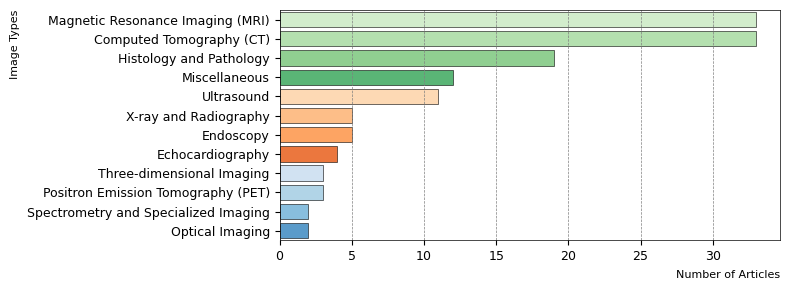

In [263]:
colors = plt.cm.tab20c.colors  # Or any other colormap that you like

# Create a new dataframe where each row has only one category
# by splitting the 'organ_category_refined' column and then using explode()
df_expanded = df1['image_category'].str.split(', ').explode().reset_index(drop=True)

# Now group by the expanded categories and count occurrences
image_counts = df_expanded.groupby(df_expanded).count().sort_values()

# Horizontal bar chart
plt.figure(figsize=(8, 3))
image_counts.sort_values(ascending=True).plot(kind='barh', color=colors, edgecolor='black', linewidth=0.5, alpha=0.8, width=0.8)
#plt.title('Distribution of Image Types Across Papers')
plt.xlabel('Number of Articles', fontsize=8, labelpad=5, loc='right')
plt.ylabel('Image Types', fontsize=8, labelpad=5, loc='top')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.ylim(-0.5, 11.5)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()  
plt.savefig('image_types.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

### Demographics
***

This code adds a new column demographics_usage to the dataframe, categorizing each paper based on how extensively it uses demographic information according to a criteria. This approach provides a clear, easy-to-understand categorization based on the presence and count of demographic information in the dataset descriptions.

**Criteria**

To aggregate the counts of demographics across four columns (age, gender, ethnicity, geolocation) into one category (demographics) with levels indicating the extent of demographics usage in papers, I have created 3 different categories:

1. No Demographic Data: For papers that do not use demographic information at all.
2. Limited Use of Demographic Data: For papers that use some demographic information, indicating a moderate level of usage.
3. Extensive Use of Demographic Data: For papers that use a lot of demographic information, indicating a high level of usage.

In [264]:
# Define the aggregation function
def aggregate_demographics(row):
    # Count the number of demographic indicators used (sum of 1s across the 4 columns)
    count = row['age'] + row['sex/gender'] + row['ethnicity'] + row['geographical location ']
    if count == 0:
        return 'No Demographic Data'
    elif 1 <= count <= 2:
        return 'Limited Use of Demographic Data'
    else:
        return 'Extensive Use of Demographic Data'

In [265]:
# Apply the function across each row
df1['demographics_usage'] = df1.apply(aggregate_demographics, axis=1)
df1[['title', 'age', 'sex/gender', 'ethnicity', 'geographical location ', 'demographics_usage']].head() # Preview the updated DataFrame
#df1.drop(columns=['age', 'sex/gender', 'ethnicity', 'geographical location '], inplace=True) # Drop the individual columns

,title,age,sex/gender,ethnicity,geographical location,demographics_usage
0,3D Arterial Segmentation via Single 2D Project...,0,1,0,0,Limited Use of Demographic Data
1,A Multi-task Network for Anatomy Identificatio...,0,0,0,0,No Demographic Data
2,A Texture Neural Network to Predict the Abnorm...,1,1,0,0,Limited Use of Demographic Data
3,ALL-IN: A Local GLobal Graph-Based DIstillatio...,0,0,0,0,No Demographic Data
4,AME-CAM: Attentive Multiple-Exit CAM for Weakl...,0,0,0,0,No Demographic Data


#### Demographics analysis
***

In [266]:
# colors = plt.cm.tab20.colors
# # Create a new dataframe where each row has only one category
# # by splitting the 'organ_category_refined' column and then using explode()
# df_expanded = df1['demographics_usage'].str.split(', ').explode().reset_index(drop=True)

# # Now group by the expanded categories and count occurrences
# demo_counts = df_expanded.groupby(df_expanded).count().sort_values()

# # Horizontal bar chart
# plt.figure(figsize=(8, 2))
# demo_counts.plot(kind='barh', color=colors,  edgecolor='black', linewidth=0.5, alpha=0.8, width=0.8)
# #plt.title('Distribution of Demographics Usage Across Papers')
# plt.xlabel('Number of Articles', fontsize=8, labelpad=5, loc='right')
# plt.ylabel('Demographics Usage', fontsize=8, labelpad=5, loc='top')
# plt.xticks(fontsize=9)
# plt.yticks(fontsize=9)
# plt.ylim(-0.5, 2.5)
# plt.grid(axis='x', linestyle='--')
# plt.tight_layout()  
# plt.savefig('demographics_usage.png', dpi=300, bbox_inches='tight', transparent=True)
# plt.show()

In [267]:
# from tkinter import font
# from typer import style

# colors = ['tab:orange', 'tab:red', 'tab:blue']

# # Create a new dataframe where each row has only one category
# # by splitting the 'demographics_usage' column and then using explode()
# df_expanded = df1['demographics_usage'].str.split(', ').explode().reset_index(drop=True)

# # Now group by the expanded categories and count occurrences
# demo_counts = df_expanded.groupby(df_expanded).count().sort_values()

# # Horizontal bar chart
# plt.figure(figsize=(4., 3.5))
# demo_counts.plot(kind='barh', color=colors, edgecolor='black', linewidth=0.5, alpha=0.8, width=0.95)

# plt.xlabel('Number of Articles', fontsize=12, labelpad=15, loc='right', style='italic').set_visible(True)
# plt.ylabel('Demographics Usage', fontsize=12, labelpad=15, loc='bottom', style='italic').set_visible(False)
# # Removing y-axis labels by setting y-tick labels to an empty list
# plt.yticks([])
# plt.grid(axis='x', linestyle='--')
# plt.ylim(-0.4, 2.4)
# plt.tight_layout()
# # Optional: Adding a legend if you have multiple categories with different colors
# category_names = demo_counts.index.tolist()
# legend_handles = [plt.Rectangle((0,0),1,1, color=colors[i], edgecolor='black') for i in range(len(category_names))]
# plt.legend(handles=legend_handles, labels=category_names, title="Categories", title_fontsize='small', fontsize='11.5', loc='upper center', 
#            frameon=True, edgecolor='black', fancybox=True, ncol=1, bbox_to_anchor=(0.5, 1.4), framealpha=1,  borderpad=0.5, labelspacing=0.3,
#            handlelength=1.8, handletextpad=1.8, columnspacing=0.5)

# plt.savefig('demographics_usage.png', dpi=300, bbox_inches='tight', transparent=True)
# plt.show()


/var/folders/bn/qvp15lc54w559qnxjpvy0bzw0000gn/T/ipykernel_83170/1486546243.py:31: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0,0),1,1, color=colors[i % len(colors)], edgecolor='black') for i in range(len(category_names))]


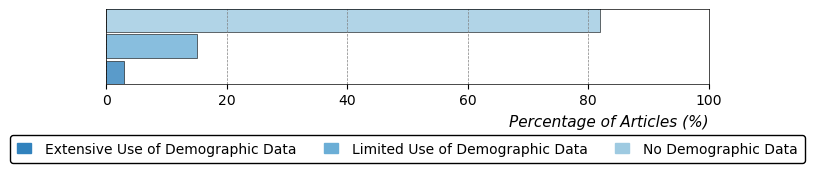

In [268]:
import matplotlib.pyplot as plt

# Assuming 'df1' and 'colors' are already defined in your script

# Create a new dataframe where each row has only one category
# by splitting the 'demographics_usage' column and then using explode()
df_expanded = df1['demographics_usage'].str.split(', ').explode().reset_index(drop=True)

# Now group by the expanded categories and count occurrences
demo_counts = df_expanded.groupby(df_expanded).count().sort_values()

# Convert counts to percentages
total_count = demo_counts.sum()
demo_percentages = (demo_counts / total_count) * 100

# Horizontal bar chart
plt.figure(figsize=(6.5, 1.5))
demo_percentages.plot(kind='barh', color=colors, edgecolor='black', linewidth=0.5, alpha=0.8, width=0.9)

plt.xlabel('Percentage of Articles (%)', fontsize=11, labelpad=5, loc='right', style='italic').set_visible(True)
plt.ylabel('Demographics Usage', fontsize=11, labelpad=5, loc='bottom', style='italic').set_visible(False)
# Removing y-axis labels by setting y-tick labels to an empty list
plt.yticks([])
plt.grid(axis='x', linestyle='--')
plt.xlim(0, 100)  # Set x limits to percentage scale (0-100)
plt.ylim(-0.4, 2.4)
plt.tight_layout()

# Optional: Adding a legend if you have multiple categories with different colors
category_names = demo_percentages.index.tolist()
legend_handles = [plt.Rectangle((0,0),1,1, color=colors[i % len(colors)], edgecolor='black') for i in range(len(category_names))]
plt.legend(handles=legend_handles, labels=category_names, fontsize='10', loc='upper center', 
           frameon=True, edgecolor='black', fancybox=True, ncol=3, bbox_to_anchor=(0.5, -0.6), framealpha=1,  borderpad=0.5, labelspacing=0.3,
           handlelength=1., handletextpad=1.)

plt.savefig('demographics_usage_percentage.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


In [269]:
# colors = plt.cm.tab20.colors

# # Creating a pie chart
# plt.figure(figsize=(7, 6))
# demo_counts.plot(kind='pie', autopct='%1.0f%%', startangle=40, counterclock=False, shadow=False, colors=colors, 
#                      pctdistance=0.80, wedgeprops={'edgecolor': 'black'}, 
#                      explode=[0.02]*len(demo_counts), radius=0.95, rotatelabels=True, normalize=True, labels=None,
#                      ylabel='', legend=True, labeldistance=1.1, textprops={'fontsize': 7, 'fontweight': 'bold', 'color': 'black', 
#                                                                            'rotation_mode': 'anchor', 'rotation': 0, 'verticalalignment': 'center'})
# #plt.title('Proportion of Demographics Usage', loc='center', fontsize=15, fontweight='bold').set_visible(True)    

# plt.legend(demo_counts.index, loc='center', bbox_to_anchor=(0.5, -0.01), title='Distribution of Demographics Usage', 
#            title_fontsize='small', fontsize='small', shadow=False, fancybox=True, ncol=2,
#            facecolor='white', edgecolor='black', frameon=True, framealpha=1, borderpad=1,
#                labelspacing=0.5, handlelength=2.5, handletextpad=1.5, handleheight=1.5)

# plt.savefig('demographics_usage_pie_chart.png', dpi=300, bbox_inches='tight', transparent=True)
# plt.show()

### Datasets
***

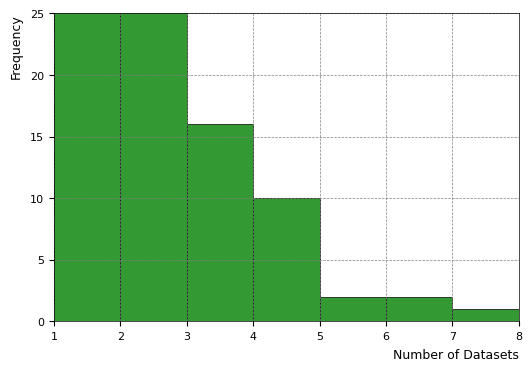

In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Dataset Quantities
plt.figure(figsize=(6, 4))
sns.histplot(df1['dataset quantity'], bins=range(1, df1['dataset quantity'].max() + 2), kde=False,
             color='green', edgecolor='black', linewidth=0.5, alpha=0.8, legend=True)
#plt.title('Histogram of Dataset Quantities', fontsize=12)
plt.xlabel('Number of Datasets', fontsize=9, labelpad=5, loc='right')
plt.ylabel('Frequency', fontsize=9, labelpad=5, loc='top')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlim(1, 8)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

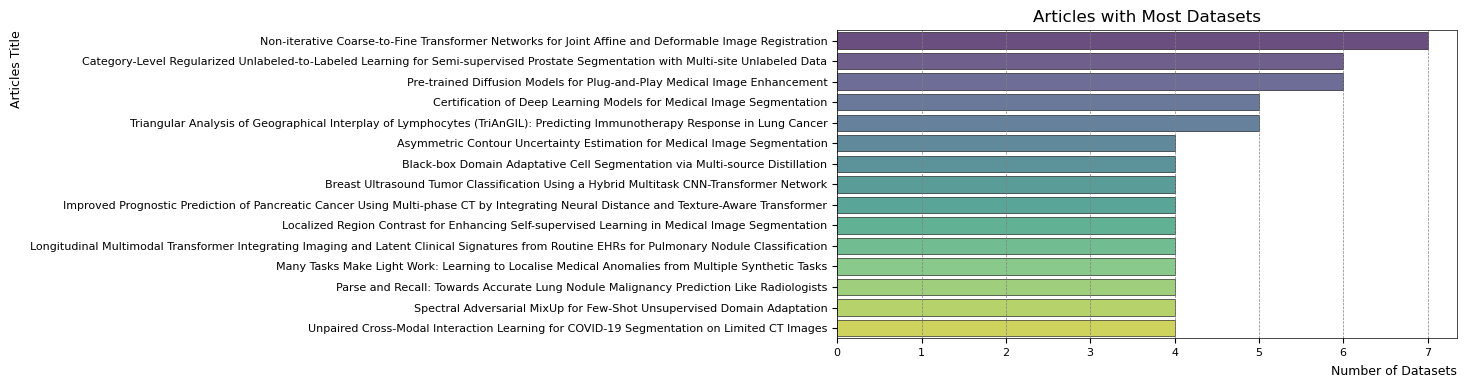

In [271]:
# Bar Chart for Papers with Most Datasets
plt.figure(figsize=(8, 4))
most_datasets = df1[df1['dataset quantity'] >= 4]  # Arbitrary threshold
sns.barplot(x='dataset quantity', y='title', data=most_datasets.sort_values(by='dataset quantity', ascending=False), palette='viridis', 
            edgecolor='black', linewidth=0.5, alpha=0.8, errorbar=None, orient='h', hue='title')
plt.title('Articles with Most Datasets')
plt.xlabel('Number of Datasets', fontsize=9, labelpad=5, loc='right')
plt.ylabel('Articles Title', fontsize=9, labelpad=5, loc='top')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='x', linestyle='--')
plt.show()

#### Dataset disclosure
1. Full Disclosure: All datasets are accounted for as either public or private.
2. Partial Disclosure: Some datasets are mentioned as public or private, but not all (the total number of datasets exceeds the sum of public and private ones mentioned)
3. No Disclosure: datasets are not mentioned as public or private, or the status of all datasets is undisclosed. 
4. No Mentions of Datasets: The sentence extraction does not provide any information of whether the datasets are private and/or public

In [272]:
def categorize_disclosure(row):
    # Handle the case where no datasets are used
    if row['dataset quantity'] == 0:
        return 'Quantities Undisclosed'
    
    # Convert public and private dataset counts to numeric, setting errors to NaN for non-numeric values
    public_count = pd.to_numeric(row['quantity of public datasets'], errors='coerce')
    private_count = pd.to_numeric(row['quantity of private datasets'], errors='coerce')
    
    # Check if both public and private dataset counts are zero or NaN
    if (public_count == 0 and private_count == 0) and row['dataset quantity'] > 0:
        return 'Status Undisclosed' 
    
    # Check for full disclosure
    if (public_count != 0 or private_count != 0) and (public_count + private_count == row['dataset quantity']):
        return 'Full Disclosure'
    
    # Check for partial disclosure
    #if (public_count > 0 and private_count == 0) and (public_count + private_count < row['dataset quantity']):        
    if (public_count > 0 and private_count == 0) and row['dataset quantity'] > public_count + private_count:
        return 'Partial Disclosure'
    
    if (public_count == 0 and private_count > 0) and row['dataset quantity'] > public_count + private_count:
        return 'Partial Disclosure'

    # Default case when dataset status is not disclosed properly
    return 'Status Undisclosed'

In [273]:
# Apply the function to each row
df1['dataset_disclosure_category'] = df1.apply(categorize_disclosure, axis=1)

# Display the DataFrame with the new disclosure category
df1[['title', 'dataset quantity', 'quantity of public datasets', 'quantity of private datasets', 'dataset_disclosure_category']]
#df1.drop(columns=['quantity of public datasets', 'quantity of private datasets'], inplace=True)
#df1.to_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/cleaned_new_annotations_final.csv', index=False)

,title,dataset quantity,quantity of public datasets,quantity of private datasets,dataset_disclosure_category
0,3D Arterial Segmentation via Single 2D Project...,1,0,1,Full Disclosure
1,A Multi-task Network for Anatomy Identificatio...,1,0,0,Status Undisclosed
2,A Texture Neural Network to Predict the Abnorm...,1,0,0,Status Undisclosed
3,ALL-IN: A Local GLobal Graph-Based DIstillatio...,3,2,0,Partial Disclosure
4,AME-CAM: Attentive Multiple-Exit CAM for Weakl...,1,0,0,Status Undisclosed
...,...,...,...,...,...
95,Triangular Analysis of Geographical Interplay ...,5,0,5,Full Disclosure
96,Uncertainty-Informed Mutual Learning for Joint...,2,2,0,Full Disclosure
97,Unpaired Cross-Modal Interaction Learning for ...,4,2,0,Partial Disclosure
98,VesselVAE: Recursive Variational Autoencoders ...,1,1,0,Full Disclosure


#### Dataset analysis
***

In [274]:
# # Total number of datasets used
# total_datasets = df1['dataset quantity'].sum()

# # Average number of datasets per paper
# average_datasets = df1['dataset quantity'].mean()

# # Total number of public and private datasets
# total_public_datasets = df1['quantity of public datasets'].sum()
# total_private_datasets = df1['quantity of private datasets'].sum()

# # Distribution by disclosure category
# disclosure_distribution = df1.groupby('dataset_disclosure_category')['dataset quantity'].sum()

# # Papers with the most datasets
# most_datasets_papers = df1[df1['dataset quantity'] == df1['dataset quantity'].max()]

# print("Total number of datasets used:", total_datasets)
# print("Average number of datasets per paper:", average_datasets)
# print("Total number of public datasets:", total_public_datasets)
# print("Total number of private datasets:", total_private_datasets)
# print("Distribution by disclosure category:\n", disclosure_distribution)
# print("Papers with the most datasets:\n", most_datasets_papers[['title', 'dataset quantity']])

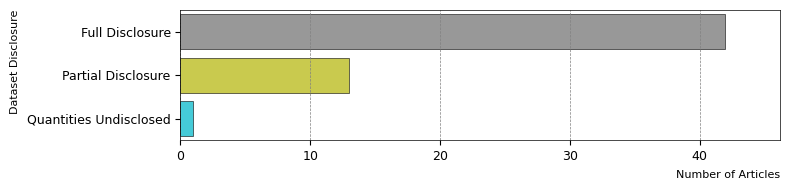

In [275]:
colors = plt.cm.tab10_r.colors

# Create a new dataframe where each row has only one category
# by splitting the 'organ_category_refined' column and then using explode()
df_expanded = df1['dataset_disclosure_category'].str.split(', ').explode().reset_index(drop=True)

# Now group by the expanded categories and count occurrences
dataset_counts = df_expanded.groupby(df_expanded).count().sort_values()

# Horizontal bar chart
plt.figure(figsize=(8, 2))
dataset_counts.plot(kind='barh', color=colors, edgecolor='black', linewidth=0.5, alpha=0.8, width=0.8)
#plt.title('Distribution of Dataset Disclosure Across Papers')
plt.xlabel('Number of Articles', fontsize=8, labelpad=5, loc='right')
plt.ylabel('Dataset Disclosure', fontsize=8, labelpad=5, loc='top')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='x', linestyle='--')
plt.ylim(-0.5, 2.5)
plt.savefig('dataset_disclosure.png', dpi=300, bbox_inches='tight', transparent=True)
plt.tight_layout()  

In [276]:
def categorize_dataset_status(row):
    if row['dataset quantity'] == 0:
        return 'None'
    elif row['quantity of public datasets'] == row['dataset quantity']:
        return 'All Public'
    elif row['quantity of private datasets'] == row['dataset quantity']:
        return 'All Private'
    elif row['quantity of public datasets'] > 0 and row['quantity of private datasets'] > 0:
        return 'Public and Private'
    elif row['quantity of public datasets'] > 0 and row['quantity of private datasets'] == 0:
        return 'Some Public Some Unknown'
    elif row['quantity of public datasets'] == 0 and row['quantity of private datasets'] > 0:
        return 'Some Private Some Unknown'
    else:
        return 'Unknown'  # This covers cases where dataset quantities do not sum up correctly or are not specified.

# Apply the function to each row
df1['dataset_status'] = df1.apply(categorize_dataset_status, axis=1)

# Now group by the new 'dataset_status' column to get counts
dataset_status_counts = df1['dataset_status'].value_counts()

In [277]:
# colors = plt.cm.Set3.colors

# # Create a new dataframe where each row has only one category
# # by splitting the 'organ_category_refined' column and then using explode()
# df_expanded = df1['dataset_status'].str.split(', ').explode().reset_index(drop=True)

# # Now group by the expanded categories and count occurrences
# dataset_status_counts = df_expanded.groupby(df_expanded).count().sort_values()

# # Horizontal bar chart
# plt.figure(figsize=(7, 2))
# dataset_status_counts.plot(kind='barh', color=colors)
# plt.title('Distribution of Private & Public Datasets Across Papers')
# plt.xlabel('Number of Papers')
# plt.ylabel('Datasets').set_visible(False)
# plt.grid(axis='x', linestyle='--')
# plt.savefig('dataset_status.png', dpi=300, bbox_inches='tight', transparent=True)
# plt.tight_layout()  

### Locations Analysis
***

In [278]:
location_cats = [
    'location ',
    'location as a healthcare facility', 'name of healthcare facility',
    'location as other (center/department/laboratory/university/institution/online)',
    'name of location as other (center/department/laboratory/university/institution/online)',
    'location as large-scale geographical entity',
    'name of location as large-scale geographical entity',
    'location as subnational geographical entity',
    'name of location as subnational geographical entity',]
df1[location_cats].head()

,location,location as a healthcare facility,name of healthcare facility,location as other (center/department/laboratory/university/institution/online),name of location as other (center/department/laboratory/university/institution/online),location as large-scale geographical entity,name of location as large-scale geographical entity,location as subnational geographical entity,name of location as subnational geographical entity
0,0,0,No Name,0,No Name,0,No Name,0,No Name
1,1,1,national hospital of neurology and neurosurgery,0,No Name,1,united kingdom,1,london
2,1,1,anonymous,0,No Name,0,No Name,0,No Name
3,0,0,No Name,0,No Name,0,No Name,0,No Name
4,0,0,No Name,0,No Name,0,No Name,0,No Name


In [279]:
# Papers with no location information vs papers with location information
location = (df1['location '] == 0).sum() 
no_location = len(df1) - location 

5. Percentage Bar Chart

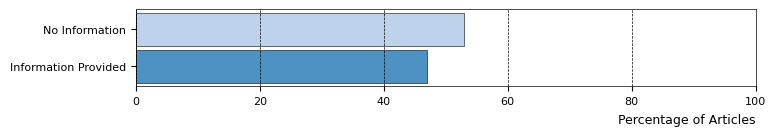

In [280]:
colors = plt.cm.tab20.colors[:3]

# Calculate percentages
total = no_location + location
percentages = [no_location / total * 100, location / total * 100]

categories = ['Information Provided', 'No Information']

# Create percentage bar chart
fig, ax = plt.subplots(figsize=(8, 1))
ax.barh(categories, percentages, color=colors, edgecolor='black', linewidth=0.5, alpha=0.8,
        height=0.9, align='center')
#plt.title('Location Information in MICCAI 2023 Articles')
plt.xlim(0, 100)  # Since it's percentages, we limit the x-axis to 100
plt.xlabel('Percentage of Articles', fontsize=9, labelpad=5, loc='right')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='x', linestyle='--', color='black')
plt.savefig('location_percentage_bar_chart.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

### Location Analysis: Distribution of the different location types
***

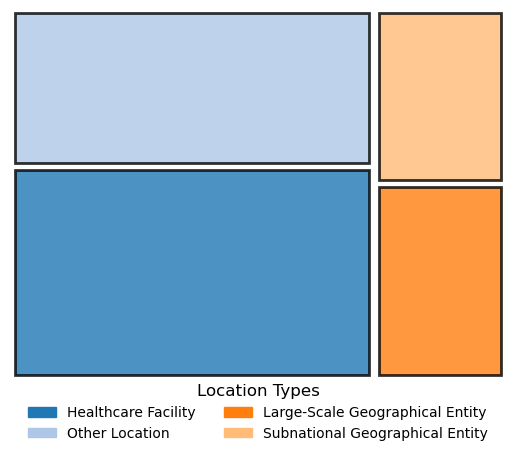

In [281]:
import squarify
import matplotlib.patches as mpatches

# Only for locations == 1
sizes = df1[['location as a healthcare facility', 
             'location as other (center/department/laboratory/university/institution/online)', 
             'location as large-scale geographical entity', 
             'location as subnational geographical entity']].sum()

colors = plt.cm.tab20.colors  # Or any other colormap that you like

# Creating a treemap without the labels
squarify.plot(sizes=sizes, alpha=0.8, color=colors, pad=True, bar_kwargs={'edgecolor': 'black', 'linewidth': 2})

# Creating legend patches
legend_labels = ['Healthcare Facility', 'Other Location', 'Large-Scale Geographical Entity', 'Subnational Geographical Entity']
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors[:len(sizes)], legend_labels)]

# Creating the legend with the custom patches
plt.legend(handles=legend_patches, loc='lower center', bbox_to_anchor=(0.5, -0.2), title='Location Types', title_fontsize='12', fontsize='10',
 shadow=False, fancybox=True, ncol=2, frameon=False)

plt.axis('off')  # Remove the axes
#plt.title('Treemap of Location Types')
plt.savefig('location_treemap.png', dpi=300, bbox_inches='tight')
plt.show()

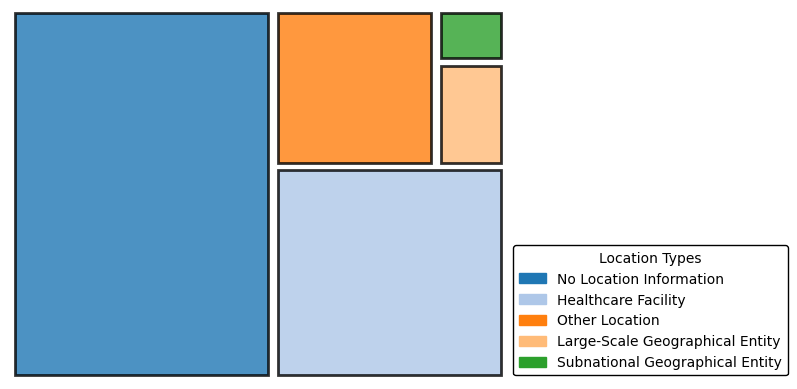

In [282]:
import squarify
import matplotlib.patches as mpatches

colors = plt.cm.tab20.colors  

# # I want a pie chart that shows the proportion of each category in the 'location ' column with the following categories:
# # - No location information
# # - Location as a healthcare facility
# # - Location as other (center/department/laboratory/university/institution/online)
# # - Location as large-scale geographical entity
# # - Location as subnational geographical entity


# First, we will create a new column 'location_category' to categorize each row
def categorize_location(row):
    if row['location '] == 0:
        return 'No Location information'
    elif row['location as a healthcare facility'] == 1:
        return 'Healthcare facility'
    elif row['location as other (center/department/laboratory/university/institution/online)'] == 1:
        return 'Other'
    elif row['location as large-scale geographical entity'] == 1:
        return 'Large-scale geographical entity'
    else:
        return 'Subnational geographical entity'

# Apply the function to create the 'location_category' column
df1['location_category'] = df1.apply(categorize_location, axis=1)


# Apply the function to create the 'location_category' column
df1['location_category'] = df1.apply(categorize_location, axis=1)

# Count the frequency of each category
location_category_counts = df1['location_category'].value_counts()

squarify.plot(sizes=location_category_counts, alpha=0.8, color=colors, pad=True, bar_kwargs={'edgecolor': 'black', 'linewidth': 2})

# Creating legend patches
legend_labels = ['No Location Information', 'Healthcare Facility', 'Other Location', 'Large-Scale Geographical Entity', 'Subnational Geographical Entity']
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors[:len(location_category_counts)], legend_labels)]

# Creating the legend with the custom patches
plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 0.38), title='Location Types', fontsize='10',
           shadow=False, fancybox=True, ncol=1, frameon=True, title_fontsize='10', 
           edgecolor='black', framealpha=1)

plt.axis('off')  # Remove the axes
#plt.title('Treemap of Location Types')
plt.savefig('location_category_treemap.png', dpi=300, bbox_inches='tight')
plt.show()

In [283]:
df1.to_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/cleaned_new_annotations_final.csv', index=False)

### Location Analysis: Name of locations
***

This section explores into deeper details of location such as name of healthcare facilities mentioned by papers, name of geographical locations and if papers define location to be other than healthcare facilities and/or geographical locations

1) How many papers provide location details?
2) What are these location details? 
3) Do they make sense - would the reader know where the data is collected from by that information provided from the paper?

#### 1. Healthcare facility
***

In [35]:
# Color palettes
# ['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 
# 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r','Accent_r', 'Dark2_r', 'Paired_r', 'Pastel1_r', 'Pastel2_r', 'Set1_r', 'Set2_r', 
# 'Set3_r', 'tab10_r', 'tab20_r', 'tab20b_r', 'tab20c_r']

In [36]:
# colors = plt.cm.tab20.colors[1]  # Or any other colormap that you like

# # Splitting the 'name of healthcare facility' 

# # Split the 'name of healthcare facility' by a delimiter (e.g., comma) if multiple values are present in a single cell
# # and then explode the dataframe to have a single value per row.
# df1['name of healthcare facility'] = df1['name of healthcare facility'].str.split(', ')  # Split by comma
# df1_exploded = df1.explode('name of healthcare facility') # Explode the DataFrame

# # Count the occurrences of each healthcare facility
# facility_counts = df1_exploded['name of healthcare facility'].value_counts()
# plt.figure(figsize=(8, 4))
# ax = facility_counts.plot(kind='barh', color=colors)
# plt.title('Details of Healthcare Facility Mentions')
# plt.xlabel('Number of Papers')
# plt.tight_layout()
# plt.show() # The readibility of the plot can be improved by splitting the names of the facilities into multiple lines

In [37]:
# Improve the readability of the plot by limiting the number of facilities shown

# Categorise the values into 
# - 'No Name' for missing values
# - 'Name Provided' for non-missing values
# - 'Anonymous' for 'anonymous' values
# - 'Abbreviation' for values that are likely abbreviations

def categorize_facility_names(name):
    if name == 'No Name' or name == np.nan or pd.isnull(name) or name == '0':
        return 'No Name'
    elif name == 'anonymous':
        return 'Anonymous'
    elif len(name) < 5:
        return 'Abbreviation'
    else:
        return 'Name Provided'

# Apply the function to create a new column
df1_exploded['facility_name_category'] = df1_exploded['name of healthcare facility'].apply(categorize_facility_names)

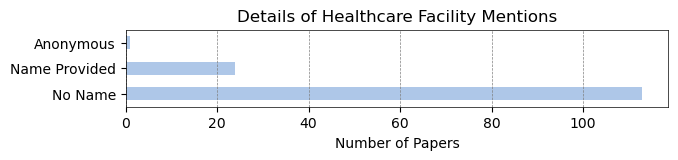

In [38]:
colors = plt.cm.tab20.colors[1]  # Or any other colormap that you like

# Plotting the refined bar chart
facility_counts_refined = df1_exploded['facility_name_category'].value_counts()
plt.figure(figsize=(7, 1))
ax = facility_counts_refined.plot(kind='barh', color=colors)
plt.title('Details of Healthcare Facility Mentions')
plt.xlabel('Number of Papers')
plt.grid(axis='x', linestyle='--')
plt.savefig('facility_mentions.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

#### 2. Locations as Other
***

In [39]:
# # Splitting the column values and exploding the DataFrame

# # Split the 'name of healthcare facility' by a delimiter (e.g., comma) if multiple values are present in a single cell
# # and then explode the dataframe to have a single value per row.
# df1['name of location as other (center/department/laboratory/university/institution/online)'] = df1['name of location as other (center/department/laboratory/university/institution/online)'].str.split(', ')  # Split by comma
# df1_exploded = df1.explode('name of location as other (center/department/laboratory/university/institution/online)') # Explode the DataFrame

# colors = plt.cm.tab20.colors[2]  # Or any other colormap that you like

# # Count the occurrences 
# loc_as_other = df1_exploded['name of location as other (center/department/laboratory/university/institution/online)'].value_counts()
# plt.figure(figsize=(12, 4))
# ax = loc_as_other.sort_values().plot(kind='barh', color=colors)
# plt.title('Details of Locations as Other Mentions')
# plt.xlabel('Number of Papers')
# plt.tight_layout()
# plt.show()

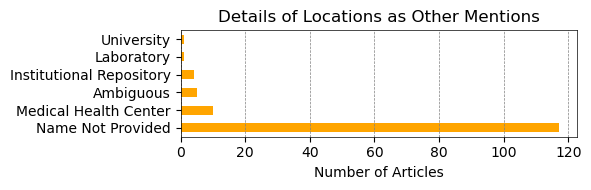

In [40]:
# Improve the readability of the plot by limiting the number of categories shown

# Categorise the values into 
# - 'Name Not Provided' for missing values
# - 'Health Center' for values that contain 'Health Center'
# - 'University' for values that contain 'university'
# - 'Laboratory' for values that contain 'Laboratory'
# - 'Archive' for values that contain 'Archive' or 'Data Portal'
# - 'Ambiguous' for values that that are ambiguous or unclear


# Define a function to categorize each location name
def categorize_location(name):
    if pd.isna(name) or name == 'No Name':
        return 'Name Not Provided'
    elif 'center' in name.lower():
        return 'Medical Health Center'
    elif 'university' in name.lower() or 'science' in name.lower():
        return 'University'
    elif 'laboratory' in name.lower():
        return 'Laboratory'
    elif 'archive' in name.lower() or 'data portal' in name.lower():
        return 'Institutional Repository'
    else:
        return 'Ambiguous'

# Apply the function to the 'location_name' column to create a new 'category' column
df1_exploded['location_as_other_category'] = df1_exploded['name of location as other (center/department/laboratory/university/institution/online)'].apply(categorize_location)

# Now group by the new 'category' column and count occurrences
category_counts = df1_exploded['location_as_other_category'].value_counts()

# Plotting the horizontal bar chart with the categorized values
plt.figure(figsize=(6, 2))  # Adjust figure size as needed
category_counts.plot(kind='barh', color='orange')  # Choose a color that fits your plot
plt.title('Details of Locations as Other Mentions')
plt.xlabel('Number of Articles')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()

# Save the plot if needed
plt.savefig('categorized_locations.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


#### 3. Location as Geographical location
***

In [41]:
# #colors = plt.cm.tab20_r.colors[:5]
# colors = plt.cm.tab20.colors[3]  # Or any other colormap that you like

# # Split the 'name of healthcare facility' by a delimiter (e.g., comma) if multiple values are present in a single cell
# # and then explode the dataframe to have a single value per row.
# df1['name of location as large-scale geographical entity'] = df1['name of location as large-scale geographical entity'].str.split(', ')  # Split by comma
# df1_exploded = df1.explode('name of location as large-scale geographical entity') # Explode the DataFrame


# # Count the occurrences 
# large_geo_loc_counts = df1_exploded['name of location as large-scale geographical entity'].value_counts()
# plt.figure(figsize=(7, 3))
# ax = large_geo_loc_counts.plot(kind='barh', color=colors)
# plt.title('Details of Large-Scale Locations Mentions')
# plt.xlabel('Number of Papers')
# plt.grid(axis='x', linestyle='--')
# plt.tight_layout()
# plt.show()


In [42]:
# # Define a function to categorize each location name
# def categorize_large_geolocation(name):
#     if pd.isna(name) or name == 'No Name':
#         return 'Name Not Provided'
#     elif 'us' in name.lower() or 'north america' in name.lower():
#         return 'North America'
#     elif 'asia' in name.lower() or 'south korea' in name.lower() or 'Israel' in name.lower():
#         return 'Asia'
#     else:
#         return 'Europe'

# df1_exploded['location_as_continent'] = df1_exploded['name of location as large-scale geographical entity'].apply(categorize_large_geolocation)

In [43]:
# # Count the occurrences 
# large_geo_loc_counts = df1_exploded['location_as_continent'].value_counts()
# plt.figure(figsize=(7, 2))
# ax = large_geo_loc_counts.plot(kind='barh', color=colors)
# plt.title('Details of Large-Scale Locations Mentions')
# plt.xlabel('Number of Papers')
# plt.grid(axis='x', linestyle='--')
# plt.tight_layout()
# plt.savefig('large_scale_geolocation.png', dpi=300, bbox_inches='tight', transparent=True)
# plt.show()

In [44]:
# colors = plt.cm.tab20.colors[4]  # Or any other colormap that you like

# # Split the 'name of healthcare facility' by a delimiter (e.g., comma) if multiple values are present in a single cell
# # and then explode the dataframe to have a single value per row.
# df1['name of location as subnational geographical entity'] = df1['name of location as subnational geographical entity'].str.split(', ')  # Split by comma
# df1_exploded = df1.explode('name of location as subnational geographical entity') # Explode the DataFrame

# # Define a function to categorize each location name
# def categorize_large_geolocation(name):
#     if pd.isna(name) or name == 'No Name':
#         return 'Name Not Provided'
#     elif 'boston' in name.lower():
#         return 'USA'
#     elif 'seoul' in name.lower():
#         return 'South Korea'
#     elif 'jerusalem' in name.lower():
#         return 'Israel'
#     elif 'london' in name.lower():
#         return 'UK'
#     elif 'salzburg' in name.lower():
#         return 'Austria'
#     elif 'helskini' in name.lower():
#         return 'Finland'
#     else:
#         return 'Ambiguous'

# df1_exploded['location_as_country'] = df1_exploded['name of location as subnational geographical entity'].apply(categorize_large_geolocation)


In [45]:
# # Count the occurrences 
# subnational_geo_loc_counts = df1['location_as_country'].value_counts()
# plt.figure(figsize=(6, 3))
# ax = subnational_geo_loc_counts.plot(kind='barh', color=colors)
# plt.title('Details of Subnational Locations Mentions')
# plt.xlabel('Number of Papers')
# plt.grid(axis='x', linestyle='--')
# plt.tight_layout()
# plt.savefig('subnational_locations.png', dpi=300, bbox_inches='tight', transparent=True)
# plt.show()

### Sex-specific organs in datasets
***

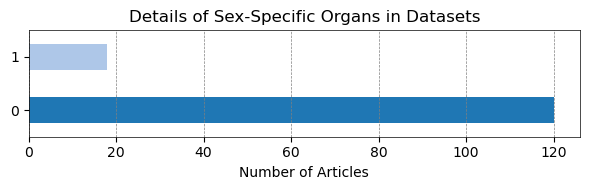

In [46]:
sex_specific_organ_counts = df1_exploded['Does the dataset contain sex-specific organ(s)?'].value_counts()
plt.figure(figsize=(6, 2))
ax = sex_specific_organ_counts.plot(kind='barh', color=plt.cm.tab20.colors)
plt.title('Details of Sex-Specific Organs in Datasets')
plt.xlabel('Number of Articles')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

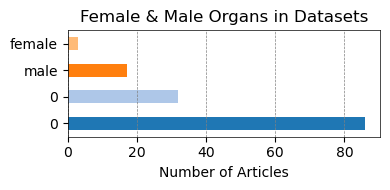

In [47]:
sex_specific_organs = df1_exploded['Female and/or male organs?'].value_counts()
plt.figure(figsize=(4, 2))
ax = sex_specific_organs.plot(kind='barh', color=plt.cm.tab20.colors)
plt.title('Female & Male Organs in Datasets')
plt.xlabel('Number of Articles')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

### Relevant information to be find outside paper's content
***

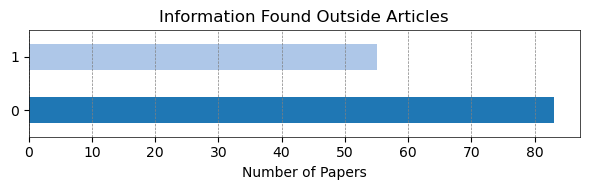

In [48]:
info_outside_paper = df1_exploded['Information found outside article (such as sup material and/or by references'].value_counts()
plt.figure(figsize=(6, 2))
ax = info_outside_paper.plot(kind='barh', color=plt.cm.tab20.colors)
plt.title('Information Found Outside Articles')
plt.xlabel('Number of Papers')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

### Data analysis and information
***

In [304]:
# Total number of articles
total_articles = df1['title'].nunique()

# Total number of datasets used
total_datasets = df1['dataset quantity'].sum()

# Average number of datasets per paper
average_datasets = df1['dataset quantity'].mean()

# Total number of public and private datasets
total_public_datasets = df1['quantity of public datasets'].sum()
total_private_datasets = df1['quantity of private datasets'].sum()
total_unknown_datasets = total_datasets - total_public_datasets - total_private_datasets

# Distribution by disclosure category
disclosure_distribution = df1.groupby('dataset_disclosure_category')['dataset quantity'].sum()
total_disclosure = disclosure_distribution.sum()

# Papers with the most datasets
most_datasets_papers = df1[df1['dataset quantity'] == df1['dataset quantity'].max()]

# Location/source information of datasets
location_info = df1['location '].value_counts()
location_as_healthcare = df1['location as a healthcare facility'].sum()
location_as_other = df1['location as other (center/department/laboratory/university/institution/online)'].sum()
location_as_large_geo = df1['location as large-scale geographical entity'].sum()
location_as_subnational = df1['location as subnational geographical entity'].sum()


# Organ Information and Usage in MICCAI 2023 Articles


# Demographics Information and Usage in MICCAI 2023 Articles
total_demo = df1['demographics_usage'].value_counts()
no_demo = total_articles - total_demo
# limited_demo = df1['demographics_usage'].str.contains('Limited Use of Demographic Data').value_counts()
# extensive_demo = df1['demographics_usage'].str.contains('Extensive Use of Demographic Data').value_counts()

print("Summary Statistics:")
print("Dataset Usage in MICCAI 2023 Articles")
print("Total number of articles:", total_articles)
print("Total number of datasets used:", total_datasets)
print("Average number of datasets per articles:", average_datasets)
print("The maximum number of datasets used in a single article:", df1['dataset quantity'].max())

print("Total number of public datasets:", total_public_datasets)
print("Total number of private datasets:", total_private_datasets)
print("Total number of unknown availability of datasets:", total_unknown_datasets)

print("Distribution by disclosure category:\n", disclosure_distribution)
print("Total number of datasets with disclosed status:", total_disclosure)

print("Source Information of Datasets in MICCAI 2023 Articles")
print("Total number of articles disclosing location information of datasets:", location)
print("Total number of articles not disclosing location information of datasets:", no_location)
print("Total number of articles with undisclosed location information of datasets:", len(df1) - location - no_location)

print("Location information of datasets:\n", location_info)
print("Location as a healthcare facility:\n", location_as_healthcare)
print("Location as other:\n", location_as_other)
print("Location as large-scale geographical entity:\n", location_as_large_geo)
print("Location as subnational geographical entity:\n", location_as_subnational)
print("Unknown location information of datasets:\n", total_datasets - location_info.sum())

print("Organ Information and Usage in MICCAI 2023 Articles")
print("Total distribution organs:", initial_organ_counts.sum()) 
print("Total number of unique organs before organising data into main categories:", len(initial_unique_organs))
print("Total distribution of organs by organ category: \n", organ_counts.sum)
print("The distribution of organs by organ category: \n", organ_counts)

print("Image Information and Usage in MICCAI 2023 Articles")
print("Total distribution of image types:\n", initial_image_type_counts.sum())
print("Total number of unique image types before organising data into main categories:", len(initial_unique_image_types))
print("Total distribution of image types by image category: \n", image_counts.sum)
print("The distribution of image types by image category: \n", image_counts)

print("Demographics Information and Usage in MICCAI 2023 Articles")
print("Total number of articles with age information of study subjects:", df1['age'].sum())
print("Total number of articles with sex/gender information of study subjects:", df1['sex/gender'].sum())
print("Total number of articles with ethnicity information of study subjects:", df1['ethnicity'].sum())
print("Total number of articles with geographical location of study subjects:", df1['geographical location '].sum())
print("Total number of articles with:", total_demo) 



Summary Statistics:
Dataset Usage in MICCAI 2023 Articles
Total number of articles: 100
Total number of datasets used: 216
Average number of datasets per articles: 2.16
The maximum number of datasets used in a single article: 7
Total number of public datasets: 79
Total number of private datasets: 34
Total number of unknown availability of datasets: 103
Distribution by disclosure category:
 dataset_disclosure_category
Full Disclosure           87
Partial Disclosure        42
Quantities Undisclosed     0
Status Undisclosed        87
Name: dataset quantity, dtype: int64
Total number of datasets with disclosed status: 216
Source Information of Datasets in MICCAI 2023 Articles
Total number of articles disclosing location information of datasets: 53
Total number of articles not disclosing location information of datasets: 47
Total number of articles with undisclosed location information of datasets: 0
Location information of datasets:
 0    53
1    47
Name: location , dtype: int64
Location a

In [94]:
''' 
Each article should only be counted once across all categories and you want to distribute 
the count of disclosed locations across different categories, then the current summing approach needs to be revised. 
Each article should contribute only once to the total count, and you need to decide on a rule for prioritizing 
which category an article belongs to if it has disclosed multiple locations.

Method to handle this:

1. Prioritize the location categories in a certain order.
2. Assign each article to the highest-priority category it qualifies for.
3. Count each article only once based on its assigned category.
'''

# Create a column for the primary location category based on priority
def determine_primary_location(row):
    if row['location as a healthcare facility']:
        return 'healthcare'
    if row['location as other (center/department/laboratory/university/institution/online)']:
        return 'other'
    if row['location as large-scale geographical entity']:
        return 'large_scale_geo'
    if row['location as subnational geographical entity']:
        return 'subnational'
    return 'undisclosed'

df1['primary_location_category'] = df1.apply(determine_primary_location, axis=1)

# Count the number of articles for each primary location category
location_counts = df1['primary_location_category'].value_counts()

# Extract the counts for each category
total_location_disclosed = len(df1) - location_counts.get('undisclosed', 0)
total_location_undisclosed = location_counts.get('undisclosed', 0)
location_as_healthcare = location_counts.get('healthcare', 0)
location_as_other = location_counts.get('other', 0)
location_as_large_geo = location_counts.get('large_scale_geo', 0)
location_as_subnational = location_counts.get('subnational', 0)

# Print out the results
print(f"Total articles not disclosing any location information: {total_location_undisclosed}")
print(f"Total articles disclosing any location information: {total_location_disclosed}")
print(f"Total articles disclosing healthcare facility location: {location_as_healthcare}")
print(f"Total articles disclosing other location: {location_as_other}")
print(f"Total articles disclosing large-scale geo location: {location_as_large_geo}")
print(f"Total articles disclosing subnational location: {location_as_subnational}")

Total articles not disclosing any location information: 55
Total articles disclosing any location information: 45
Total articles disclosing healthcare facility location: 27
Total articles disclosing other location: 15
Total articles disclosing large-scale geo location: 3
Total articles disclosing subnational location: 0


### Grouping categories
***

In [51]:
df = pd.read_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/cleaned_new_annotations_final.csv')
print(df.shape) # 62 unique papers and 47 columns

(100, 47)


#### Distribution of Demographics

In [11]:
from tkinter import font

colors = plt.cm.tab20_r.colors[5:]

# Convert categories to numerical values where 1 represents the presence of a category
demographics = ['age', 'sex/gender', 'ethnicity', 'geographical location ' ]
df_dummy = pd.get_dummies(df[demographics])

# Remove entries with 'no demographics' or any undesired category from 'demographics_usage'
df_filtered = df[df['demographics_usage'] != 'No Demographic Data']

# Use the filtered DataFrame for further processing
df_dummy_filtered = pd.get_dummies(df_filtered[demographics])

# Summing up the dummies under each 'demographics_usage' to see how many of each category are present
pivot_df = df_dummy_filtered.groupby(df_filtered['demographics_usage']).sum()

labels_demo = ['Age', 'Sex', 'Ethnicity', 'Geographical Location']

# Plotting the data in a stacked bar chart format
ax = pivot_df.plot(kind='barh', stacked=True, figsize=(10, 3.6), color=colors, width=0.95,
              edgecolor='black', linewidth=0.5, alpha=0.8)

plt.title('Distribution of Demographic Categories').set_visible(False)
plt.ylabel('Demographic Usage', loc='top', fontsize=12, labelpad=15, style='italic').set_visible(True)
ax.set_yticklabels(['Extensive Use', 'Limited Use'], fontsize=12, rotation=0, fontweight='bold', va='center')
plt.xlabel('Distribution of Demographic Categories', loc='right',fontsize=12, labelpad=15, style='italic' ).set_visible(True)
plt.ylim(-0.4, 1.4)
plt.grid(axis='x', linestyle='--')
plt.legend(labels = labels_demo, bbox_to_anchor=(0.125, -0.65), loc='lower center', fontsize='11.5', title_fontsize='small',
           title='Demographic Categories', shadow=False, fancybox=True, ncol=4, frameon=True, 
           edgecolor='black', framealpha=1, borderpad=0.5, labelspacing=0.3, handlelength=1.5, handletextpad=0.5, handleheight=1.5)
plt.tight_layout()
plt.savefig('demographics_stacked_bar_chart.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


NameError: name 'df' is not defined

In [53]:
# from tkinter import font


# colors = plt.cm.tab20.colors

# # Convert categories to numerical values where 1 represents the presence of a category
# demographics = ['age', 'sex/gender', 'ethnicity', 'geographical location ' ]
# df_dummy = pd.get_dummies(df[demographics])

# # Remove entries with 'no demographics' or any undesired category from 'demographics_usage'
# df_filtered = df[df['demographics_usage'] != 'No Demographic Data']

# # Use the filtered DataFrame for further processing
# df_dummy_filtered = pd.get_dummies(df_filtered[demographics])

# # Summing up the dummies under each 'demographics_usage' to see how many of each category are present
# pivot_df = df_dummy_filtered.groupby(df_filtered['demographics_usage']).sum()

# labels_demo = ['Age', 'Sex', 'Ethnicity', 'Geographical Location']

# # Plotting the data in a stacked bar chart format
# ax = pivot_df.plot(kind='bar', stacked=True, figsize=(4, 4), color=colors, fontsize=9, width=0.9,
#               edgecolor='black', linewidth=0.5, alpha=0.8)
# plt.title('Distribution of Demographic Categories').set_visible(False)
# plt.xlabel('Demographic Usage', loc='right').set_visible(False)
# ax.set_xticklabels(['Extensive Use', 'Limited Use'], fontsize=10, rotation=0, ha='center', va='top', rotation_mode='anchor',
#                    fontweight='bold', fontstretch='normal')
# plt.ylabel('Demographic Usage', loc='top',  fontsize=9, labelpad=10, style='italic')
# plt.grid(axis='x', linestyle='--')
# plt.legend(labels = labels_demo, bbox_to_anchor=(0.08, 0.4), loc='lower left', fontsize='10', title_fontsize='small',
#            title='Demographic Categories', shadow=False, fancybox=True, ncol=1, frameon=True, 
#            edgecolor='black', framealpha=1, borderpad=1)
# plt.tight_layout()
# plt.savefig('demographics_stacked_bar_chart.png', dpi=300, bbox_inches='tight', transparent=True)
# plt.show()


#### Organ distribution in "No Demographic Data"

In [54]:
# Expand the 'organ_category_refined' to separate rows for each category
df['organ_category_refined'] = df['organ_category_refined'].str.split(', ')
df_expanded = df.explode('organ_category_refined')

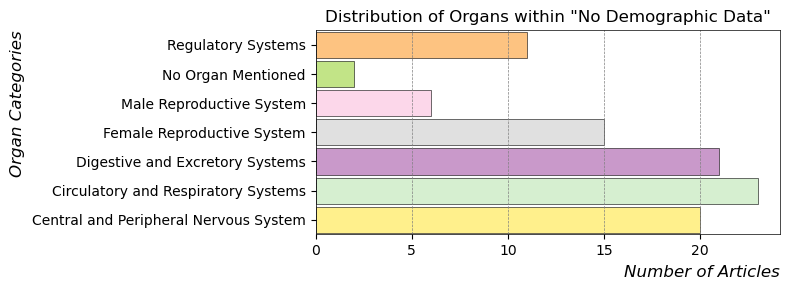

In [55]:
from tkinter import font
colors = plt.cm.Set3_r.colors  # Or any other colormap that you like

# Filter the data for 'No Demographic Data'
no_demo_data = df_expanded[df_expanded['demographics_usage'] == 'No Demographic Data']

# Group by 'organ_category_refined' to count occurrences within the 'No Demographic Data' group
grouped_no_demo = no_demo_data.groupby('organ_category_refined').size().reset_index(name='Count')

# Plotting the details for 'No Demographic Data' with horizontal bars
plt.figure(figsize=(8, 3))
plt.barh(grouped_no_demo['organ_category_refined'], grouped_no_demo['Count'], color=colors, 
          edgecolor='black', linewidth=0.5, alpha=0.8, height=0.9)
plt.title('Distribution of Organs within "No Demographic Data"')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Organ Categories', fontsize=12, labelpad=5, loc='top', style='italic')
plt.xlabel('Number of Articles', fontsize=12, labelpad=5, loc='right', style='italic')
plt.ylim(-0.5, 6.5)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()  
plt.savefig('organs_no_demographic_data.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [56]:
# Prepare 'organ_types' by removing brackets and quotes, then splitting and exploding
df['organ_types'] = df['organ_types'].str.strip('[]').str.replace("'", "").str.split(', ')
df_expanded = df.explode('organ_types')

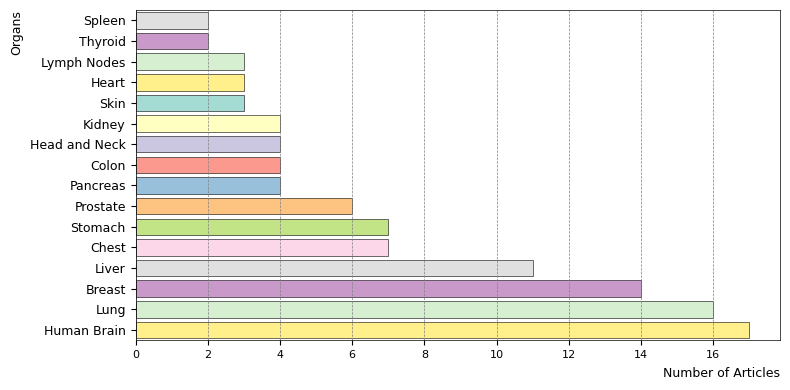

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Invert the mapping dictionary to replace each variant with the standardized organ name
organ_mapping = {
    'colon\\n\\n\\n': 'Colon',
    'colon\n\n\n\n': 'Colon',
    'colorectal': 'Colon',
    'brain ': 'Human Brain',
    'brain': 'Human Brain',
    'human brain': 'Human Brain',
    'cerebral': 'Human Brain',
    'breast': 'Breast',
    'liver': 'Liver',
    'lung': 'Lung',
    'prostate': 'Prostate',
    'pancreas': 'Pancreas',
    'kidney': 'Kidney',
    'hepatic vein': 'Kidney',
    'head': 'Head and Neck',
    'neck': 'Head and Neck',
    'abdomen': 'Stomach',
    'stomach': 'Stomach',
    'chest': 'Chest',
    'eye': 'Eye',
    'gallbladder': 'Gallbladder',  # Fixed the typo from 'allbladder' to 'gallbladder'
    'heart': 'Heart',
    'bladder': 'Bladder',
    'lymp nodes': 'Lymph Nodes',  # Adjusted the case to match other categories
    'pelvic region': 'Pelvic Region',
    'skin': 'Skin',
    'spleen': 'Spleen',
    'swine liver': 'Swine Liver',
    'monkey brain': 'Monkey Brain',
    'thyroid': 'Thyroid',
    'whole body': 'Whole Body',
    'no organ mentioned': 'No Organ Mentioned',
    'hepatic': 'Liver',
    'head and neck': 'Head and Neck',
    'colon  ': 'Colon',
    'femoral head': 'Pelvic Bone'}

# Replace organ names in the DataFrame with standardized names using the mapping
df_expanded['organ_types'] = df_expanded['organ_types'].apply(lambda x: organ_mapping.get(x, x))

# Filter the data for 'No Demographic Data'
no_demo_data = df_expanded[df_expanded['demographics_usage'] == 'No Demographic Data']

# Regroup by 'organ_types' and count occurrences
grouped_no_demo = no_demo_data.groupby('organ_types').size().reset_index(name='Count')

# Sort the DataFrame based on 'Count' to make the plot more readable
grouped_no_demo_sorted = grouped_no_demo.sort_values('Count', ascending=False)

# Plotting the details for 'No Demographic Data' with horizontal bars for individual organs
colors = plt.cm.Set3_r.colors  # Or any other colormap that you like
plt.figure(figsize=(8,4))  # Adjust the figure size as needed
plt.barh(grouped_no_demo_sorted['organ_types'], grouped_no_demo_sorted['Count'], color=colors,
            edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)
#plt.title('Distribution of Individual Organs within "No Demographic Data"')
plt.xlabel('Number of Articles', fontsize=9, labelpad=5, loc='right')
plt.ylabel('Organs', fontsize=9, labelpad=5, loc='top')
plt.xticks(fontsize=8, color='black')
plt.yticks(fontsize=9, color='black')
plt.ylim(-0.5, 15.5)  # Adjust the y-axis limits to fit all categories
plt.grid(axis='x', linestyle='--')
plt.tight_layout()  
plt.savefig('individual_organs_no_demographic_data.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


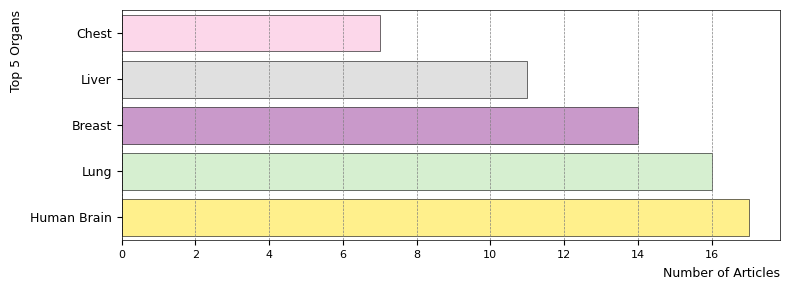

In [58]:
# Sort the DataFrame based on 'Count' to make the plot more readable and get top 5
top_5_organs = grouped_no_demo_sorted.head(5)

# Plotting the top 5 organs for 'No Demographic Data' with horizontal bars
colors = plt.cm.Set3_r.colors[:5]  

# Horizontal bar chart for the top 5 organs
plt.figure(figsize=(8, 3))  
plt.barh(top_5_organs['organ_types'], top_5_organs['Count'], color=colors,
         edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)
plt.ylabel('Top 5 Organs', fontsize=9, labelpad=5, loc='top')
plt.xlabel('Number of Articles', fontsize=9, labelpad=5, loc='right')
plt.xticks(fontsize=8, color='black')
plt.yticks(fontsize=9,  color='black')
plt.ylim(-0.5, 4.5)  
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.savefig('top_5_organs_no_demographic_data.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

#### Distribution of Organs by Demographics
***

In [62]:
df = pd.read_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/cleaned_new_annotations_final.csv')
print(df.shape) # 62 unique papers and 47 columns

(100, 47)


In [63]:
# Expand the 'organ_category_refined' to separate rows for each category
df_expanded = df.drop('organ_category_refined', axis=1).join(
    df['organ_category_refined'].str.split(', ').explode().reset_index(drop=True))

In [64]:
# colors = plt.cm.Set3_r.colors  # Or any other colormap that you like

# # Group by 'demographics_usage' and the expanded 'organ_category_refined', then count each group
# grouped = df_expanded.groupby(['demographics_usage', 'organ_category_refined']).size().reset_index(name='Count')

# # Pivot data to get 'organ_category_refined' categories as columns filled with counts
# pivot_df = grouped.pivot_table(index='demographics_usage', columns='organ_category_refined', values='Count', fill_value=0)

# # Plotting the horizontal stacked bar chart
# ax = pivot_df.plot(kind='barh', stacked=True, figsize=(8, 3.28), color=colors, fontsize=9, width=0.9,
#               edgecolor='black', linewidth=0.5, alpha=0.8)
# plt.xlabel('Distribution of Organs by Articles', fontsize=12, labelpad=15, loc='right', style='italic').set_visible(True)
# plt.ylabel('Demographics Usage', fontsize=12, labelpad=15, loc='top', style='italic' ).set_visible(True)
# ax.set_yticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold', va='top')

# plt.xticks(fontsize=10)
# plt.ylim(-0.5, 2.5)
# plt.legend(title='Organ Categories', bbox_to_anchor=(1, -0.03), loc='lower left', fontsize='11', title_fontsize='small',
#               shadow=False, fancybox=True, ncol=1, frameon=True, edgecolor='black', framealpha=1, borderpad=1,
#               labelspacing=0.3, handlelength=1.5, handletextpad=1.5, handleheight=1.5)
# plt.grid(axis='x', linestyle='--')
# plt.savefig('organs_by_demographics.png', dpi=300, bbox_inches='tight', transparent=True)
# plt.show()

In [72]:
# colors = plt.cm.Set3_r.colors  # Or any other colormap that you like

# # Group by 'demographics_usage' and the expanded 'organ_category_refined', then count each group
# grouped = df_expanded.groupby(['demographics_usage', 'organ_category_refined']).size().reset_index(name='Count')

# # Pivot data to get 'organ_category_refined' categories as columns filled with counts
# pivot_df = grouped.pivot_table(index='demographics_usage', columns='organ_category_refined', values='Count', fill_value=0)

# # Plotting the horizontal stacked bar chart
# ax = pivot_df.plot(kind='bar', stacked=True, figsize=(8, 5.8), color=colors, fontsize=11, width=0.95,
#               edgecolor='black', linewidth=0.5, alpha=0.8)
# plt.ylabel('Distribution of Organs', fontsize=12, labelpad=15, loc='top', style='italic').set_visible(True)
# plt.xlabel('Demographics Usage', fontsize=12, labelpad=15, loc='right', style='italic' ).set_visible(True)
# ax.set_xticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold', va='top')
# plt.yticks(fontsize=9)
# plt.xlim(-0.49, 2.49)

# plt.legend(title='Organ Categories', bbox_to_anchor=(1, -0.02), loc='lower left', fontsize='11.5', title_fontsize='small',
#               shadow=False, fancybox=True, ncol=1, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5,
#               labelspacing=0.5, handlelength=2., handletextpad=1., handleheight=2.5)
# plt.grid(axis='x', linestyle='--')
# plt.savefig('organs_by_demographics.png', dpi=300, bbox_inches='tight', transparent=True)
# plt.show()

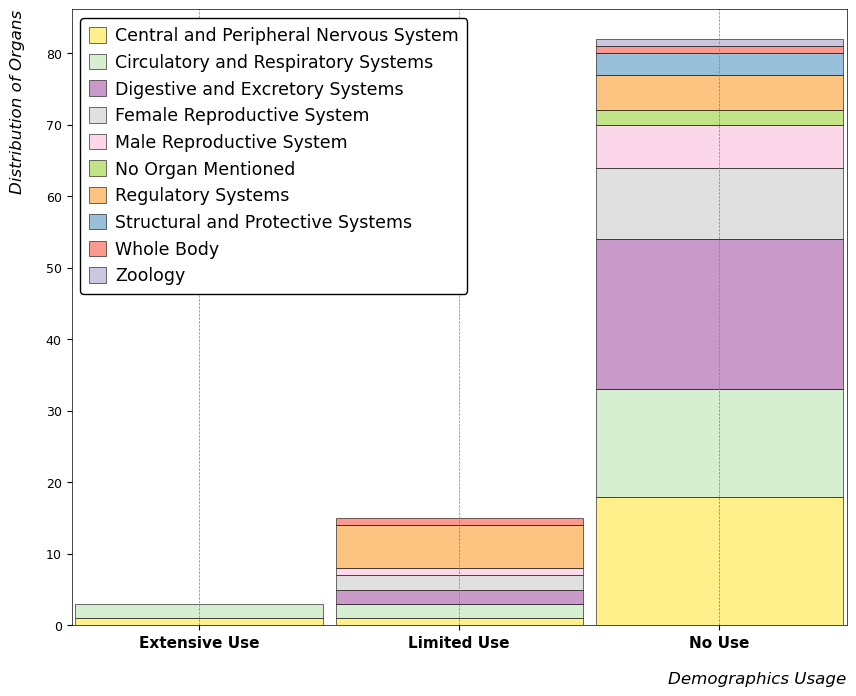

In [73]:
colors = plt.cm.Set3_r.colors  # Or any other colormap that you like

# Group by 'demographics_usage' and the expanded 'organ_category_refined', then count each group
grouped = df_expanded.groupby(['demographics_usage', 'organ_category_refined']).size().reset_index(name='Count')

# Plotting the horizontal stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 8), color=colors, width=0.95,
              edgecolor='black', linewidth=0.5, alpha=0.8)
plt.ylabel('Distribution of Organs', fontsize=12, labelpad=15, loc='top', style='italic').set_visible(True)
plt.xlabel('Demographics Usage', fontsize=12, labelpad=15, loc='right', style='italic' ).set_visible(True)
ax.set_xticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold', va='top')
plt.yticks(fontsize=9)
plt.xlim(-0.49, 2.49)

#bbox_to_anchor=(0.5, -0.3),
plt.legend(loc='upper left', fontsize='12.5',
              shadow=False, fancybox=True, ncol=1, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5,
              labelspacing=0.5, handlelength=1., handletextpad=0.5, handleheight=1.)
plt.grid(axis='x', linestyle='--')
plt.savefig('organs_by_demographics.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

#### Distribution of Images by Demographics

In [ ]:
# from cProfile import label


# colors = plt.cm.tab20c.colors  # Or any other colormap that you like

# # Expand the 'organ_category_refined' to separate rows for each category
# df_expanded = df.drop('image_category', axis=1).join(
#     df['image_category'].str.split(', ').explode().reset_index(drop=True)
# )

# # Group by 'demographics_usage' and the expanded 'organ_category_refined', then count each group
# grouped = df_expanded.groupby(['demographics_usage', 'image_category']).size().reset_index(name='Count')

# # Pivot data to get 'organ_category_refined' categories as columns filled with counts
# pivot_df = grouped.pivot_table(index='demographics_usage', columns='image_category', values='Count', fill_value=0)

# # Plotting the horizontal stacked bar chart
# pivot_df.plot(kind='barh', stacked=True, figsize=(18, 4), color=colors, width=0.9,
#               edgecolor='black', linewidth=0.5, alpha=0.8)
# plt.xlabel('Image Types in Articles', fontsize=9, labelpad=5, loc='right').set_visible(False)
# plt.ylabel('Demographic Usage', fontsize=12, labelpad=10, loc='top', style='italic').set_visible(False)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=25, rotation=0, fontweight='bold')
# plt.ylim(-0.5, 2.5)
# plt.legend(bbox_to_anchor=(1.01, -0.2), fontsize='25', 
#               shadow=False, fancybox=True, ncol=3, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5,
#                labelspacing=0.5, handlelength=1.5, handletextpad=1.5, handleheight=1.5)
# plt.grid(axis='x', linestyle='--')
# plt.savefig('image_types_by_demographics.png', dpi=300, bbox_inches='tight', transparent=True)
# plt.show()

In [ ]:
# from cProfile import label


# colors = plt.cm.tab20c.colors  # Or any other colormap that you like

# # Expand the 'organ_category_refined' to separate rows for each category
# df_expanded = df.drop('image_category', axis=1).join(
#     df['image_category'].str.split(', ').explode().reset_index(drop=True)
# )

# # Group by 'demographics_usage' and the expanded 'organ_category_refined', then count each group
# grouped = df_expanded.groupby(['demographics_usage', 'image_category']).size().reset_index(name='Count')

# # Pivot data to get 'organ_category_refined' categories as columns filled with counts
# pivot_df = grouped.pivot_table(index='demographics_usage', columns='image_category', values='Count', fill_value=0)

# # Plotting the horizontal stacked bar chart
# ax = pivot_df.plot(kind='bar', stacked=True, figsize=(5, 5.7), color=colors, width=0.95,
#               edgecolor='black', linewidth=0.5, alpha=0.8)

# plt.ylabel('Distribution of Image Types', fontsize=12, labelpad=15, loc='top', style='italic').set_visible(True)
# plt.xlabel('Demographic Usage', fontsize=12, labelpad=15, loc='right', style='italic').set_visible(True)
# ax.set_xticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')
# plt.xlim(-0.49, 2.49)
# plt.legend(bbox_to_anchor=(1., 1.02), fontsize='14', 
#               shadow=False, fancybox=True, ncol=1, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5,
#                labelspacing=0.55, handlelength=1.6, handletextpad=1.6, handleheight=1.6)
# plt.grid(axis='x', linestyle='--')
# plt.savefig('image_types_by_demographics.png', dpi=300, bbox_inches='tight', transparent=True)
# plt.show()

In [ ]:
# from cProfile import label


# colors = plt.cm.tab20c.colors  # Or any other colormap that you like

# # Expand the 'organ_category_refined' to separate rows for each category
# df_expanded = df.drop('image_category', axis=1).join(
#     df['image_category'].str.split(', ').explode().reset_index(drop=True)
# )

# # Group by 'demographics_usage' and the expanded 'organ_category_refined', then count each group
# grouped = df_expanded.groupby(['demographics_usage', 'image_category']).size().reset_index(name='Count')

# # Pivot data to get 'organ_category_refined' categories as columns filled with counts
# pivot_df = grouped.pivot_table(index='demographics_usage', columns='image_category', values='Count', fill_value=0)

# # Plotting the horizontal stacked bar chart
# ax = pivot_df.plot(kind='bar', stacked=True, figsize=(6, 5), color=colors, width=0.95,
#               edgecolor='black', linewidth=0.5, alpha=0.8)

# plt.ylabel('Distribution of Image Types', fontsize=12, labelpad=15, loc='top', style='italic').set_visible(True)
# plt.xlabel('Demographic Usage', fontsize=12, labelpad=15, loc='right', style='italic').set_visible(True)
# ax.set_xticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')
# plt.xlim(-0.49, 2.49)
# plt.legend(bbox_to_anchor=(0.5, -0.6), fontsize='11.5', loc='lower center',
#               shadow=False, fancybox=True, ncol=2, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5,
#                labelspacing=0.3, handlelength=1., handletextpad=0.5, handleheight=1.)
# plt.grid(axis='x', linestyle='--')
# plt.savefig('image_types_by_demographics.png', dpi=300, bbox_inches='tight', transparent=True)
# plt.show()

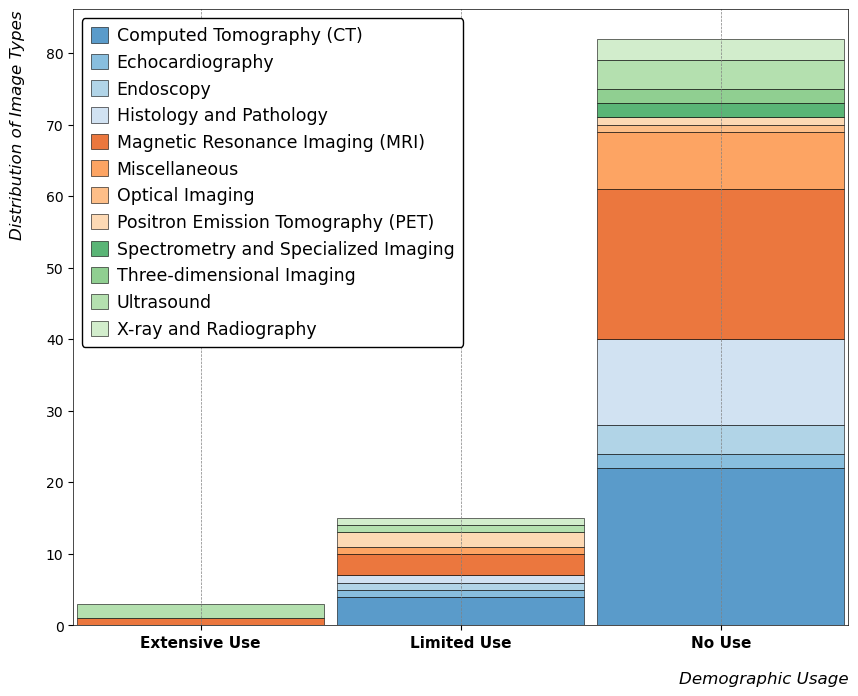

In [74]:
from cProfile import label

colors = plt.cm.tab20c.colors  # Or any other colormap that you like

# Expand the 'organ_category_refined' to separate rows for each category
df_expanded = df.drop('image_category', axis=1).join(
    df['image_category'].str.split(', ').explode().reset_index(drop=True)
)

# Group by 'demographics_usage' and the expanded 'organ_category_refined', then count each group
grouped = df_expanded.groupby(['demographics_usage', 'image_category']).size().reset_index(name='Count')

# Pivot data to get 'organ_category_refined' categories as columns filled with counts
pivot_df = grouped.pivot_table(index='demographics_usage', columns='image_category', values='Count', fill_value=0)

# Plotting the horizontal stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 8), color=colors, width=0.95,
              edgecolor='black', linewidth=0.5, alpha=0.8)

plt.ylabel('Distribution of Image Types', fontsize=12, labelpad=15, loc='top', style='italic').set_visible(True)
plt.xlabel('Demographic Usage', fontsize=12, labelpad=15, loc='right', style='italic').set_visible(True)
ax.set_xticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')
plt.xlim(-0.49, 2.49)
plt.legend(fontsize='12.5', loc='upper left', shadow=False, fancybox=True, ncol=1, frameon=True, edgecolor='black', framealpha=1, 
borderpad=0.5,labelspacing=0.5, handlelength=1., handletextpad=0.5, handleheight=1.)
plt.grid(axis='x', linestyle='--')
plt.savefig('image_types_by_demographics.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

#### Distribution of Location types by Demographics

In [ ]:
# colors = plt.cm.Set2.colors[4:]

# # Group by 'Demographic' and 'Organ', then count each group
# grouped = df.groupby(['demographics_usage', 'location_category']).size().reset_index(name='Count')

# # Pivot data to get 'Organ' categories as columns filled with counts
# pivot_df = grouped.pivot_table(index='demographics_usage', columns='location_category', values='Count', fill_value=0)

# # Plotting
# ax = pivot_df.plot(kind='barh', stacked=True, figsize=(8, 2.5), color=colors, fontsize=11, width=0.95,
#               edgecolor='black', linewidth=0.5, alpha=0.8)
# #plt.title('Distribution of Location Types by Demographics')
# plt.ylabel('Demographic Usage', fontsize=12, labelpad=15, loc='top', style='italic').set_visible(True)
# plt.xlabel('Distribution of Location Types', fontsize=12, labelpad=15, loc='right', style='italic').set_visible(True)
# ax.set_yticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')

# plt.ylim(-0.5, 2.5)
# plt.legend(title='Location Types', loc='lower right', fontsize='11.5', title_fontsize='small',bbox_to_anchor=(1.55, -0.04),
#            shadow=False, fancybox=True, ncol=1, frameon=True, edgecolor='black', framealpha=1, borderpad=1,
#             labelspacing=0.3, handlelength=1.5, handletextpad=1., handleheight=1.5)
# plt.grid(axis='x', linestyle='--')
# plt.savefig('location_types_by_demographics.png', dpi=300, bbox_inches='tight', transparent=True)
# plt.show()

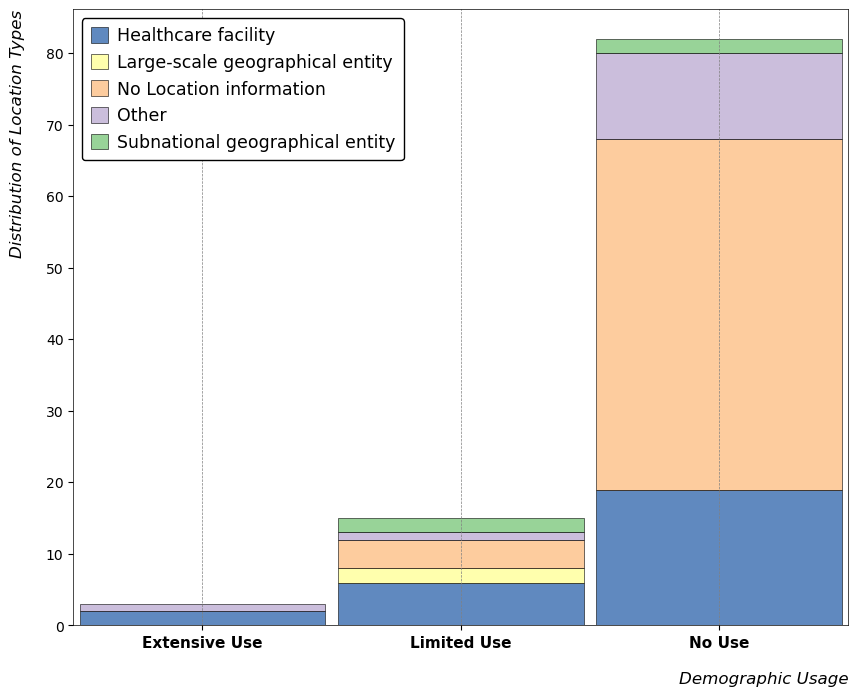

In [75]:
colors = plt.cm.Accent_r.colors[3:]

# Group by 'Demographic' and 'Organ', then count each group
grouped = df.groupby(['demographics_usage', 'location_category']).size().reset_index(name='Count')

# Pivot data to get 'Organ' categories as columns filled with counts
pivot_df = grouped.pivot_table(index='demographics_usage', columns='location_category', values='Count', fill_value=0)

# Plotting
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 8), color=colors,  width=0.95,
              edgecolor='black', linewidth=0.5, alpha=0.8)
#plt.title('Distribution of Location Types by Demographics')
plt.xlabel('Demographic Usage', fontsize=12, labelpad=15, loc='right', style='italic').set_visible(True)
plt.ylabel('Distribution of Location Types', fontsize=12, labelpad=15, loc='top', style='italic').set_visible(True)
ax.set_xticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')
plt.xlim(-0.5, 2.5)
plt.legend(loc='upper left', fontsize='12.5', title_fontsize='small',
           shadow=False, fancybox=True, ncol=1, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5,
            labelspacing=0.5, handlelength=1., handletextpad=0.5, handleheight=1.)
plt.grid(axis='x', linestyle='--')
plt.savefig('location_types_by_demographics.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

#### Distribution of Dataset by Demographics

In [ ]:
# # Number of papers disclosing dataset information grouped by 'Demographics' and 'Dataset Disclosure'
# from turtle import title


# colors = plt.cm.tab10_r.colors

# # Group by 'Demographic' and 'Organ', then count each group
# grouped = df.groupby(['demographics_usage', 'dataset_disclosure_category']).size().reset_index(name='Count')

# # Pivot data to get 'Organ' categories as columns filled with counts
# pivot_df = grouped.pivot_table(index='demographics_usage', columns='dataset_disclosure_category', values='Count', fill_value=0)

# # Plotting
# ax = pivot_df.plot(kind='barh', stacked=True, figsize=(8, 4), color=colors, fontsize=9, width=0.95,
#               edgecolor='black', linewidth=0.5, alpha=0.8)
# #plt.title('Distribution of Dataset Disclosure by Demographics')
# plt.xlabel('Demographic').set_visible(False)
# plt.ylabel('Count of Dataset Disclosure').set_visible(False)
# ax.set_yticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')

# plt.yticks(fontsize=10)
# plt.ylim(-0.49, 2.49)
# plt.legend(title='Dataset Disclosure', bbox_to_anchor=(1., 0.35), fontsize='11.5', title_fontsize='small', 
#            shadow=False, fancybox=True, ncol=1, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5,
#            labelspacing=0.3, handlelength=1., handletextpad=1.0, handleheight=1.)
# plt.grid(axis='x', linestyle='--')
# plt.savefig('dataset_disclosure_by_demographics.png', dpi=300, bbox_inches='tight', transparent=True)
# plt.show()

In [ ]:
# # Number of papers disclosing dataset information grouped by 'Demographics' and 'Dataset Disclosure'
# from turtle import title

# colors = plt.cm.tab10_r.colors

# # Group by 'Demographic' and 'Organ', then count each group
# grouped = df.groupby(['demographics_usage', 'dataset_disclosure_category']).size().reset_index(name='Count')

# # Pivot data to get 'Organ' categories as columns filled with counts
# pivot_df = grouped.pivot_table(index='demographics_usage', columns='dataset_disclosure_category', values='Count', fill_value=0)

# # Plotting
# ax = pivot_df.plot(kind='bar', stacked=True, figsize=(5, 5), color=colors, fontsize=9, width=0.95,
#               edgecolor='black', linewidth=0.5, alpha=0.8)
# #plt.title('Distribution of Dataset Disclosure by Demographics')
# plt.xlabel('Demographic').set_visible(False)
# plt.ylabel('Demographic Usage', fontsize=9, labelpad=10, loc='top', style='italic'
#            ).set_visible(True)
# plt.yticks(fontsize=10)
# plt.xlim(-0.49, 2.49)
# ax.set_xticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')
# plt.legend(title='Dataset Disclosure',bbox_to_anchor=(0.6, 0.55) , fontsize='11.5', title_fontsize='small', 
#            shadow=False, fancybox=True, ncol=1, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5,
#            labelspacing=0.3, handlelength=1., handletextpad=0.5, handleheight=1.)
# plt.grid(axis='x', linestyle='--')
# plt.savefig('dataset_disclosure_by_demographics.png', dpi=300, bbox_inches='tight', transparent=True)
# plt.show()

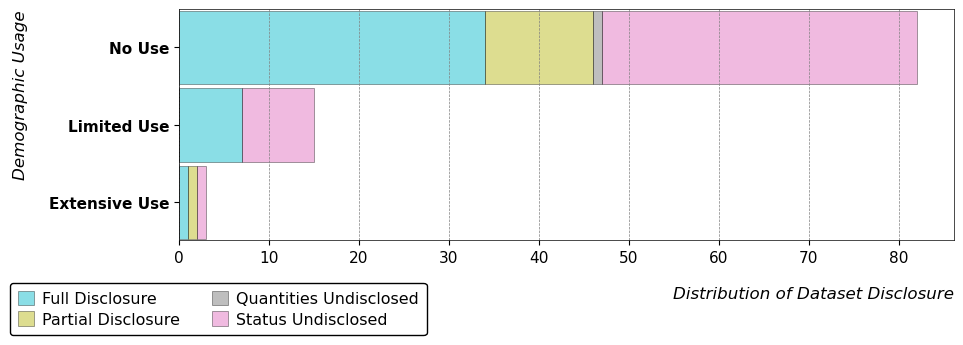

In [76]:
# Number of papers disclosing dataset information grouped by 'Demographics' and 'Dataset Disclosure'
from turtle import title

colors = plt.cm.tab10_r.colors

# Group by 'Demographic' and 'Organ', then count each group
grouped = df.groupby(['demographics_usage', 'dataset_disclosure_category']).size().reset_index(name='Count')

# Pivot data to get 'Organ' categories as columns filled with counts
pivot_df = grouped.pivot_table(index='demographics_usage', columns='dataset_disclosure_category', values='Count', fill_value=0)

# Plotting
ax = pivot_df.plot(kind='barh', stacked=True, figsize=(10, 3), color=colors, width=0.95,
              edgecolor='black', linewidth=0.5, alpha=0.5)
#plt.title('Distribution of Dataset Disclosure by Demographics')
plt.xlabel('Distribution of Dataset Disclosure', fontsize=12, labelpad=15, loc='right', style='italic').set_visible(True)
plt.ylabel('Demographic Usage', fontsize=12, labelpad=15, loc='top', style='italic').set_visible(True)
plt.xticks(fontsize=11)
plt.ylim(-0.49, 2.49)
ax.set_yticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')
plt.legend(bbox_to_anchor=(0.33, -0.15) , fontsize='11.5', 
           shadow=False, fancybox=True, ncol=2, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5,
           labelspacing=0.3, handlelength=1., handletextpad=0.5, handleheight=1.)
plt.grid(axis='x', linestyle='--')
plt.savefig('dataset_disclosure_by_demographics.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [ ]:
# from cProfile import label
# # Number of datasets used by each paper and the corresponding demographics usage
# colors = plt.cm.tab20c.colors[10:]

# grouped = df.groupby(['demographics_usage', 'dataset quantity']).size().reset_index(name='Count')

# # Pivot data to get 'Organ' categories as columns filled with counts
# pivot_df = grouped.pivot_table(index='demographics_usage', columns='dataset quantity', values='Count', fill_value=0)

# dataset_labels = ['1 Dataset', '2 Datasets', '3 Datasets', '4 Datasets', '5 Datasets', '6 Datasets']

# # Plotting
# ax = pivot_df.plot(kind='barh', stacked=True, figsize=(8, 2), color=colors, fontsize=10, width=0.95,
#               edgecolor='black', linewidth=0.5, alpha=0.8)
# #plt.title('Distribution of Dataset Quantity by Demographics')
# plt.xlabel('Number of datasets used by Articles', fontsize=11, labelpad=10, loc='right', style='italic').set_visible(True)
# plt.ylabel('Demographic Usage', fontsize=9, labelpad=5, loc='top').set_visible(False)
# ax.set_yticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')

# plt.ylim(-0.5, 2.49)
# plt.legend(labels = dataset_labels, loc='lower right', fontsize='11.5', bbox_to_anchor=(1.25, -0.05), 
#            shadow=False, fancybox=True, ncol=1, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5,
#            labelspacing=0.3, handlelength=1.3, handletextpad=1., handleheight=1.45)
# plt.grid(axis='x', linestyle='--')
# plt.savefig('dataset_quantity_by_demographics.png', dpi=300, bbox_inches='tight', transparent=True)
# plt.show()

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming df is defined in your script
# colors = plt.cm.tab20c.colors[10:]

# # Convert the index to a list if it's not already categorical
# categories = pivot_df.index.tolist()
# pivot_df['Total'] = pivot_df.sum(axis=1)

# # Plotting
# fig, ax = plt.subplots(figsize=(10, 2.5))

# # Plot a stacked horizontal bar chart
# pivot_df.drop(columns='Total').plot(kind='barh', stacked=True, ax=ax, color=colors, edgecolor='black',
#                                     linewidth=0.5, alpha=0.8, width=0.95, legend=False)


# # Annotate with counts and percentages
# for i, demographic_usage in enumerate(categories):
#     cumulative_count = 0  # Keep track of cumulative count to position annotations correctly
#     for dataset_quantity in pivot_df.columns[:-1]:  # Exclude the 'Total' column
#         count = pivot_df.loc[demographic_usage, dataset_quantity]
#         if count > 0:
#             # Position the annotation in the middle of the bar segment
#             ax.text(cumulative_count + (count / 2), i, f'{count}\n', 
#                     ha='center', va='top', fontsize=10, fontweight='bold', color='black', rotation=0)
#         cumulative_count += count  # Update cumulative count

# # Enhance the appearance
# ax.set_xlabel('Distribution of Datasets', fontsize=12, labelpad=15, loc='right', style='italic')
# ax.set_ylabel('Demographic Usage', fontsize=12, labelpad=15, loc='top', style='italic')
# ax.set_yticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold', va='top')
# ax.tick_params(axis='y', labelsize=10)
# ax.tick_params(axis='x', labelsize=10)
# plt.ylim(-0.5, 2.5)
# # plt.legend(title='Number of Datasets', loc='lower right', fontsize='11.5', title_fontsize='small',
# #            shadow=False, fancybox=True, ncol=3, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5,
# #            labelspacing=0.3, handlelength=1., handletextpad=0.5, handleheight=1.)
# plt.grid(axis='x', linestyle='--')
# plt.tight_layout()
# plt.savefig('dataset_quantity_by_demographics_with_counts_and_percentages.png', dpi=300, bbox_inches='tight', transparent=True)
# plt.show()


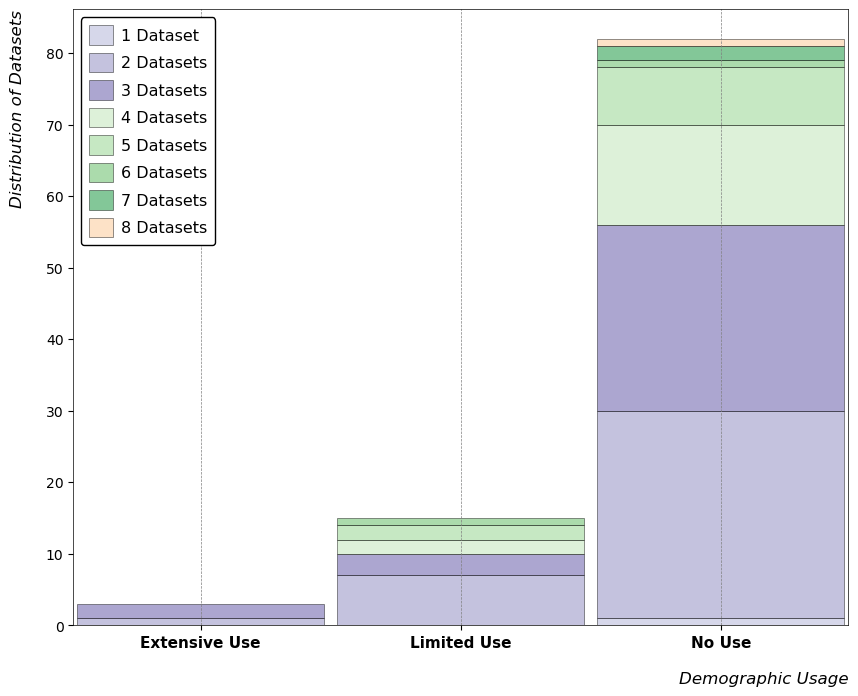

In [78]:
from cProfile import label
# Number of datasets used by each paper and the corresponding demographics usage
colors = plt.cm.tab20c_r.colors[5:]

grouped = df.groupby(['demographics_usage', 'dataset quantity']).size().reset_index(name='Count')

# Pivot data to get 'Organ' categories as columns filled with counts
pivot_df = grouped.pivot_table(index='demographics_usage', columns='dataset quantity', values='Count', fill_value=0)

dataset_labels = ['1 Dataset', '2 Datasets', '3 Datasets', '4 Datasets', '5 Datasets', '6 Datasets', '7 Datasets', '8 Datasets']

# Plotting
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 8), color=colors, width=0.95,
              edgecolor='black', linewidth=0.5, alpha=0.6)
#plt.title('Distribution of Dataset Quantity by Demographics')
plt.ylabel('Distribution of Datasets', fontsize=12, labelpad=15, loc='top', style='italic').set_visible(True)
plt.xlabel('Demographic Usage', fontsize=12, labelpad=15, loc='right', style='italic').set_visible(True)
ax.set_xticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')
plt.xlim(-0.49, 2.49)
plt.legend(labels = dataset_labels, loc='upper left', fontsize='11.5', 
           shadow=False, fancybox=True, ncol=1, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5,
           labelspacing=0.5, handlelength=1.5, handletextpad=0.5, handleheight=1.5)
plt.grid(axis='x', linestyle='--')
plt.savefig('dataset_quantity_by_demographics.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

### Plotly
***

In [ ]:
import pandas as pd
import plotly.graph_objects as go

def prepare_and_plot_sankey(file_path):
    # Load data
    data = pd.read_csv(file_path)
    
    # Select relevant columns and handle missing values
    sankey_data = data[['organ_category_refined', 'demographics_usage']].fillna('Unknown')
    
    # Expand the 'organ_category_refined' to separate rows for each category
    # Assuming categories are separated by ', ' (comma and space)
    sankey_data['organ_category_refined'] = sankey_data['organ_category_refined'].str.split(', ')
    sankey_data = sankey_data.explode('organ_category_refined')
    
    # Create a dataframe for Sankey diagram that includes source, target, and count of flows
    sankey_df = sankey_data.groupby(['organ_category_refined', 'demographics_usage']).size().reset_index(name='count')
    sankey_df['source'] = sankey_df['organ_category_refined'].astype(str)
    sankey_df['target'] = sankey_df['demographics_usage']
    
    # Map each unique node to an index for Plotly's Sankey diagram
    all_nodes = pd.concat([sankey_df['source'], sankey_df['target']]).unique()
    node_indices = {node: i for i, node in enumerate(all_nodes)}
    
    # Convert node names to indices for the Sankey diagram
    sankey_df['source'] = sankey_df['source'].map(node_indices)
    sankey_df['target'] = sankey_df['target'].map(node_indices)

    # Create the Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=25,
            thickness=50,
            line=dict(color="black", width=0.5),
            label=all_nodes,
      
        ),
        link=dict(
            source=sankey_df['source'],
            target=sankey_df['target'],
            value=sankey_df['count']
        ))])
    
    fig.update_layout(title_text="Sankey Diagram: Organ to Demographics Category Distribution",
                      font_size=12, width=1000, height=800, autosize=False, margin=dict(l=100, r=100, t=100, b=100),
                      plot_bgcolor='rgba(0,0,0,0)', hovermode='x', hoverlabel=dict(bgcolor='white', font_size=12, font_family='Arial', 
                      font_color='black', bordercolor='black'))
    return fig

# Example function call (commented out for now)
fig = prepare_and_plot_sankey('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/cleaned_new_annotations_final_2.csv')
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

def prepare_and_plot_sankey(file_path):
    # Load data
    data = pd.read_csv(file_path)
    
    # Select relevant columns and handle missing values
    sankey_data = data[['image_category', 'demographics_usage']].fillna('Unknown')
    
    # Expand the 'organ_category_refined' to separate rows for each category
    # Assuming categories are separated by ', ' (comma and space)
    sankey_data['image_category'] = sankey_data['image_category'].str.split(', ')
    sankey_data = sankey_data.explode('image_category')
    
    # Create a dataframe for Sankey diagram that includes source, target, and count of flows
    sankey_df = sankey_data.groupby(['image_category', 'demographics_usage']).size().reset_index(name='count')
    sankey_df['source'] = sankey_df['image_category'].astype(str)
    sankey_df['target'] = sankey_df['demographics_usage']
    
    # Map each unique node to an index for Plotly's Sankey diagram
    all_nodes = pd.concat([sankey_df['source'], sankey_df['target']]).unique()
    node_indices = {node: i for i, node in enumerate(all_nodes)}
    
    # Convert node names to indices for the Sankey diagram
    sankey_df['source'] = sankey_df['source'].map(node_indices)
    sankey_df['target'] = sankey_df['target'].map(node_indices)

    # Create the Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=25,
            thickness=50,
            line=dict(color="black", width=0.5),
            label=all_nodes,
          
        ),
        link=dict(
            source=sankey_df['source'],
            target=sankey_df['target'],
            value=sankey_df['count']
        ))])
    
    fig.update_layout(title_text="Sankey Diagram: Image Types to Demographics Category Distribution",
                      font_size=12, width=1000, height=800, autosize=False, margin=dict(l=100, r=100, t=100, b=100),
                      plot_bgcolor='rgba(0,0,0,0)', hovermode='x', hoverlabel=dict(bgcolor='white', font_size=12, font_family='Arial', 
                      font_color='black', bordercolor='black'))
    return fig

# Example function call (commented out for now)
fig = prepare_and_plot_sankey('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/cleaned_new_annotations_final_2.csv')
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

def prepare_and_plot_sankey_extended(file_path):
    # Load data
    data = pd.read_csv(file_path)
    
    # Select relevant columns including new ones
    sankey_data = data[['demographics_usage', 'location_category', 'image_category', 'organ_category_refined']]
    
    # Handle missing values
    sankey_data.fillna('Unknown', inplace=True)
    
    # Expand the 'organ_category_refined' and 'image_category' to separate rows for each category
    # Assuming categories are separated by ', ' (comma and space)
    sankey_data['organ_category_refined'] = sankey_data['organ_category_refined'].str.split(', ')
    sankey_data = sankey_data.explode('organ_category_refined').explode('image_category')

    # Create a dataframe for Sankey diagram that includes source, target, and count of flows
    sankey_df = pd.DataFrame(columns=['source', 'target', 'value'])

    # Define the order of columns for the flow: demographics to location/image category to organ category
    demographic_columns = ['demographics_usage']
    intermediate_columns = ['location_category']
    
    # First handle flows from demographic to intermediate categories
    for demo_col in demographic_columns:
        for inter_col in intermediate_columns:
            flow_counts = sankey_data.groupby([demo_col, inter_col]).size().reset_index(name='count')
            flow_counts['source'] = flow_counts[demo_col].astype(str)
            flow_counts['target'] = flow_counts[inter_col].astype(str)
            sankey_df = pd.concat([sankey_df, flow_counts[['source', 'target', 'count']]], axis=0)
    
    # Now handle flows from intermediate categories to organ category
    for inter_col in intermediate_columns:
        flow_counts = sankey_data.groupby([inter_col, 'organ_category_refined']).size().reset_index(name='count')
        flow_counts['source'] = flow_counts[inter_col].astype(str)
        flow_counts['target'] = flow_counts['organ_category_refined'].astype(str)
        sankey_df = pd.concat([sankey_df, flow_counts[['source', 'target', 'count']]], axis=0)
    
    # Map each unique node to an index for Plotly's Sankey diagram
    all_nodes = pd.concat([sankey_df['source'], sankey_df['target']]).unique()
    node_indices = {node: i for i, node in enumerate(all_nodes)}
    
    # Convert node names to indices
    sankey_df['source'] = sankey_df['source'].map(node_indices)
    sankey_df['target'] = sankey_df['target'].map(node_indices)
    
    # Create the Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=all_nodes,
            

        ),
        link=dict(
            source=sankey_df['source'],
            target=sankey_df['target'],
            value=sankey_df['count']
        ))])
    
    fig.update_layout(title_text="Sankey Diagram: Detailed Demographic Flows to Organ Category",
                      font_size=10)
    return fig

# Example function call (commented out for now)
fig = prepare_and_plot_sankey_extended('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/cleaned_new_annotations_final_2.csv')
fig.show()
